In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json


input_encoder = Input(shape=(28, 28, 1))
input_decoder = Input(shape=(4, 4, 4))

with open('decoder.json', 'r') as f:
    decoder = model_from_json(f.read())
    decoder.load_weights("decoder.h5")
    
with open('encoder.json', 'r') as f:
    encoder = model_from_json(f.read())
    encoder.load_weights("encoder.h5")
    
with open('autoencoder.json', 'r') as f:
    autoencoder = model_from_json(f.read())
    autoencoder.load_weights("autoencoder.h5")
    

/home/ganimedes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


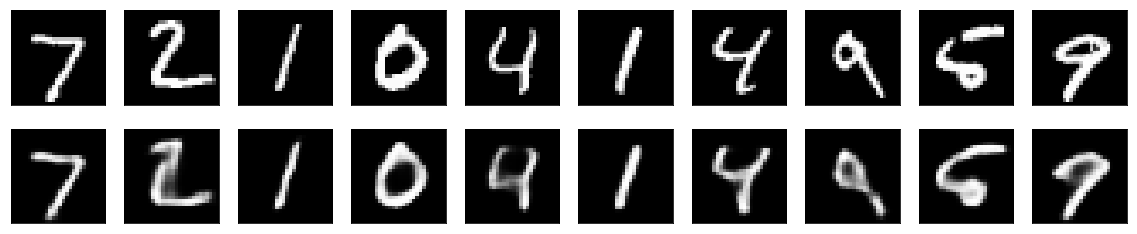

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
data_x = encoder.predict(x_train)
print(data_x.shape)

(60000, 4, 4, 4)


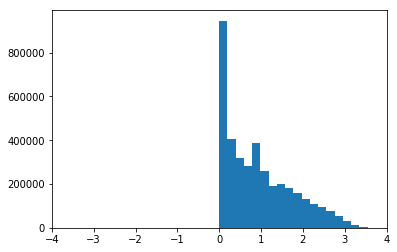

In [5]:
plt.xlim(-4, 4)
plt.hist(data_x.reshape(60000 * 64), normed=False, bins=20)
plt.show()

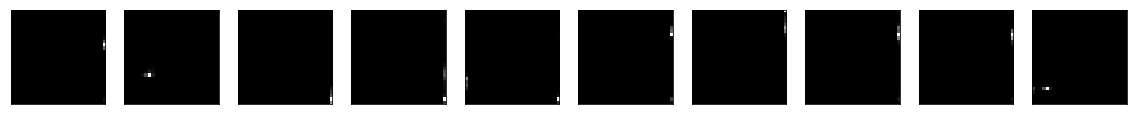

0 [D loss: 0.900449, acc.: 37.50%] [G loss: 0.716389]
1 [D loss: 0.741247, acc.: 44.53%] [G loss: 0.926404]
2 [D loss: 0.624820, acc.: 79.69%] [G loss: 1.123771]
3 [D loss: 0.534603, acc.: 97.66%] [G loss: 1.278016]
4 [D loss: 0.487015, acc.: 99.22%] [G loss: 1.388864]
5 [D loss: 0.438347, acc.: 100.00%] [G loss: 1.476611]
6 [D loss: 0.410484, acc.: 100.00%] [G loss: 1.526383]
7 [D loss: 0.393388, acc.: 100.00%] [G loss: 1.554949]
8 [D loss: 0.379223, acc.: 100.00%] [G loss: 1.544588]
9 [D loss: 0.389343, acc.: 98.44%] [G loss: 1.522940]
10 [D loss: 0.443143, acc.: 94.53%] [G loss: 1.506481]
11 [D loss: 0.452715, acc.: 90.62%] [G loss: 1.503569]
12 [D loss: 0.483328, acc.: 92.97%] [G loss: 1.461790]
13 [D loss: 0.516055, acc.: 82.03%] [G loss: 1.492794]
14 [D loss: 0.580283, acc.: 74.22%] [G loss: 1.439093]
15 [D loss: 0.606667, acc.: 64.84%] [G loss: 1.405214]
16 [D loss: 0.726042, acc.: 40.62%] [G loss: 1.332057]
17 [D loss: 0.723546, acc.: 38.28%] [G loss: 1.284759]
18 [D loss: 0.77

149 [D loss: 0.661546, acc.: 45.31%] [G loss: 0.738639]
150 [D loss: 0.686445, acc.: 42.19%] [G loss: 0.728459]
151 [D loss: 0.681655, acc.: 37.50%] [G loss: 0.728942]
152 [D loss: 0.675444, acc.: 42.19%] [G loss: 0.742888]
153 [D loss: 0.671159, acc.: 42.97%] [G loss: 0.749565]
154 [D loss: 0.638806, acc.: 50.78%] [G loss: 0.764471]
155 [D loss: 0.634770, acc.: 49.22%] [G loss: 0.771684]
156 [D loss: 0.637619, acc.: 49.22%] [G loss: 0.765951]
157 [D loss: 0.648394, acc.: 51.56%] [G loss: 0.766731]
158 [D loss: 0.654628, acc.: 46.09%] [G loss: 0.768529]
159 [D loss: 0.648984, acc.: 47.66%] [G loss: 0.762903]
160 [D loss: 0.682123, acc.: 46.09%] [G loss: 0.724700]
161 [D loss: 0.710659, acc.: 39.84%] [G loss: 0.723543]
162 [D loss: 0.745482, acc.: 37.50%] [G loss: 0.715211]
163 [D loss: 0.711438, acc.: 41.41%] [G loss: 0.746360]
164 [D loss: 0.706781, acc.: 33.59%] [G loss: 0.783273]
165 [D loss: 0.704712, acc.: 35.94%] [G loss: 0.786246]
166 [D loss: 0.694332, acc.: 37.50%] [G loss: 0.

296 [D loss: 0.682539, acc.: 57.03%] [G loss: 0.786873]
297 [D loss: 0.688007, acc.: 50.78%] [G loss: 0.786217]
298 [D loss: 0.706068, acc.: 46.88%] [G loss: 0.796970]
299 [D loss: 0.698006, acc.: 53.12%] [G loss: 0.798286]
300 [D loss: 0.687421, acc.: 56.25%] [G loss: 0.801061]
301 [D loss: 0.679653, acc.: 62.50%] [G loss: 0.794098]
302 [D loss: 0.676538, acc.: 57.81%] [G loss: 0.792659]
303 [D loss: 0.683157, acc.: 53.12%] [G loss: 0.783981]
304 [D loss: 0.692500, acc.: 49.22%] [G loss: 0.764346]
305 [D loss: 0.692432, acc.: 54.69%] [G loss: 0.786170]
306 [D loss: 0.689822, acc.: 46.88%] [G loss: 0.773942]
307 [D loss: 0.681860, acc.: 57.03%] [G loss: 0.777300]
308 [D loss: 0.684308, acc.: 53.91%] [G loss: 0.787724]
309 [D loss: 0.679371, acc.: 55.47%] [G loss: 0.792321]
310 [D loss: 0.687420, acc.: 59.38%] [G loss: 0.790378]
311 [D loss: 0.690383, acc.: 54.69%] [G loss: 0.790398]
312 [D loss: 0.674440, acc.: 60.16%] [G loss: 0.797550]
313 [D loss: 0.682341, acc.: 60.94%] [G loss: 0.

447 [D loss: 0.687016, acc.: 53.91%] [G loss: 0.765469]
448 [D loss: 0.691223, acc.: 50.78%] [G loss: 0.776423]
449 [D loss: 0.682724, acc.: 55.47%] [G loss: 0.770268]
450 [D loss: 0.686131, acc.: 53.12%] [G loss: 0.765623]
451 [D loss: 0.681531, acc.: 57.03%] [G loss: 0.771191]
452 [D loss: 0.689222, acc.: 50.78%] [G loss: 0.772034]
453 [D loss: 0.691911, acc.: 45.31%] [G loss: 0.778844]
454 [D loss: 0.687361, acc.: 54.69%] [G loss: 0.765480]
455 [D loss: 0.688277, acc.: 51.56%] [G loss: 0.767510]
456 [D loss: 0.685597, acc.: 56.25%] [G loss: 0.768900]
457 [D loss: 0.681723, acc.: 57.03%] [G loss: 0.771106]
458 [D loss: 0.686000, acc.: 57.81%] [G loss: 0.763932]
459 [D loss: 0.672230, acc.: 60.16%] [G loss: 0.763119]
460 [D loss: 0.680965, acc.: 53.12%] [G loss: 0.762473]
461 [D loss: 0.689466, acc.: 54.69%] [G loss: 0.768560]
462 [D loss: 0.685412, acc.: 50.78%] [G loss: 0.771874]
463 [D loss: 0.678785, acc.: 63.28%] [G loss: 0.780526]
464 [D loss: 0.679533, acc.: 59.38%] [G loss: 0.

596 [D loss: 0.681363, acc.: 54.69%] [G loss: 0.738184]
597 [D loss: 0.677782, acc.: 62.50%] [G loss: 0.739709]
598 [D loss: 0.680255, acc.: 53.12%] [G loss: 0.742072]
599 [D loss: 0.690050, acc.: 47.66%] [G loss: 0.737290]
600 [D loss: 0.684407, acc.: 57.03%] [G loss: 0.740979]
601 [D loss: 0.684751, acc.: 56.25%] [G loss: 0.748100]
602 [D loss: 0.679850, acc.: 56.25%] [G loss: 0.742227]
603 [D loss: 0.686863, acc.: 55.47%] [G loss: 0.745646]
604 [D loss: 0.683351, acc.: 60.16%] [G loss: 0.752804]
605 [D loss: 0.679975, acc.: 59.38%] [G loss: 0.745378]
606 [D loss: 0.678637, acc.: 61.72%] [G loss: 0.747221]
607 [D loss: 0.686060, acc.: 53.91%] [G loss: 0.761308]
608 [D loss: 0.686412, acc.: 59.38%] [G loss: 0.750397]
609 [D loss: 0.684796, acc.: 62.50%] [G loss: 0.756154]
610 [D loss: 0.676669, acc.: 63.28%] [G loss: 0.757280]
611 [D loss: 0.683927, acc.: 55.47%] [G loss: 0.751560]
612 [D loss: 0.688966, acc.: 57.81%] [G loss: 0.757670]
613 [D loss: 0.676161, acc.: 64.84%] [G loss: 0.

746 [D loss: 0.680971, acc.: 59.38%] [G loss: 0.754326]
747 [D loss: 0.681274, acc.: 59.38%] [G loss: 0.746879]
748 [D loss: 0.677068, acc.: 57.81%] [G loss: 0.742953]
749 [D loss: 0.675452, acc.: 64.06%] [G loss: 0.735618]
750 [D loss: 0.673768, acc.: 60.94%] [G loss: 0.735092]
751 [D loss: 0.679951, acc.: 54.69%] [G loss: 0.745838]
752 [D loss: 0.685097, acc.: 60.94%] [G loss: 0.754851]
753 [D loss: 0.675267, acc.: 61.72%] [G loss: 0.735328]
754 [D loss: 0.679647, acc.: 58.59%] [G loss: 0.747877]
755 [D loss: 0.677073, acc.: 61.72%] [G loss: 0.745009]
756 [D loss: 0.678470, acc.: 53.12%] [G loss: 0.749183]
757 [D loss: 0.687063, acc.: 57.81%] [G loss: 0.745581]
758 [D loss: 0.672567, acc.: 63.28%] [G loss: 0.754330]
759 [D loss: 0.672889, acc.: 58.59%] [G loss: 0.744480]
760 [D loss: 0.671183, acc.: 67.19%] [G loss: 0.749071]
761 [D loss: 0.674466, acc.: 64.84%] [G loss: 0.749546]
762 [D loss: 0.687672, acc.: 57.03%] [G loss: 0.747856]
763 [D loss: 0.673159, acc.: 66.41%] [G loss: 0.

897 [D loss: 0.675853, acc.: 62.50%] [G loss: 0.745615]
898 [D loss: 0.662685, acc.: 64.84%] [G loss: 0.764868]
899 [D loss: 0.676708, acc.: 64.84%] [G loss: 0.750477]
900 [D loss: 0.675389, acc.: 60.16%] [G loss: 0.738554]
901 [D loss: 0.675273, acc.: 58.59%] [G loss: 0.751877]
902 [D loss: 0.689769, acc.: 48.44%] [G loss: 0.751009]
903 [D loss: 0.673419, acc.: 55.47%] [G loss: 0.735227]
904 [D loss: 0.682653, acc.: 60.16%] [G loss: 0.760378]
905 [D loss: 0.664083, acc.: 65.62%] [G loss: 0.758739]
906 [D loss: 0.675445, acc.: 57.03%] [G loss: 0.752771]
907 [D loss: 0.680579, acc.: 57.81%] [G loss: 0.739516]
908 [D loss: 0.673585, acc.: 58.59%] [G loss: 0.741988]
909 [D loss: 0.665444, acc.: 56.25%] [G loss: 0.759592]
910 [D loss: 0.691869, acc.: 53.91%] [G loss: 0.760801]
911 [D loss: 0.686218, acc.: 50.78%] [G loss: 0.791725]
912 [D loss: 0.678188, acc.: 60.94%] [G loss: 0.762251]
913 [D loss: 0.665287, acc.: 67.19%] [G loss: 0.760912]
914 [D loss: 0.668307, acc.: 65.62%] [G loss: 0.

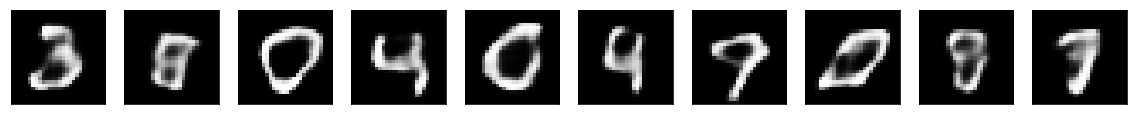

1000 [D loss: 0.666909, acc.: 64.06%] [G loss: 0.758958]
1001 [D loss: 0.659620, acc.: 63.28%] [G loss: 0.768258]
1002 [D loss: 0.670149, acc.: 60.16%] [G loss: 0.761311]
1003 [D loss: 0.663874, acc.: 64.06%] [G loss: 0.742215]
1004 [D loss: 0.673362, acc.: 56.25%] [G loss: 0.747739]
1005 [D loss: 0.681568, acc.: 50.78%] [G loss: 0.776707]
1006 [D loss: 0.661233, acc.: 64.06%] [G loss: 0.763640]
1007 [D loss: 0.664585, acc.: 64.84%] [G loss: 0.785411]
1008 [D loss: 0.680428, acc.: 56.25%] [G loss: 0.775880]
1009 [D loss: 0.688465, acc.: 50.00%] [G loss: 0.800048]
1010 [D loss: 0.662135, acc.: 61.72%] [G loss: 0.786215]
1011 [D loss: 0.680751, acc.: 57.03%] [G loss: 0.796203]
1012 [D loss: 0.683477, acc.: 55.47%] [G loss: 0.778005]
1013 [D loss: 0.673717, acc.: 57.81%] [G loss: 0.798489]
1014 [D loss: 0.687257, acc.: 53.12%] [G loss: 0.802156]
1015 [D loss: 0.663035, acc.: 65.62%] [G loss: 0.785595]
1016 [D loss: 0.678443, acc.: 53.91%] [G loss: 0.789543]
1017 [D loss: 0.668312, acc.: 6

1147 [D loss: 0.673189, acc.: 60.16%] [G loss: 0.786400]
1148 [D loss: 0.668860, acc.: 57.81%] [G loss: 0.776794]
1149 [D loss: 0.647867, acc.: 69.53%] [G loss: 0.791564]
1150 [D loss: 0.637931, acc.: 68.75%] [G loss: 0.848733]
1151 [D loss: 0.644574, acc.: 72.66%] [G loss: 0.867613]
1152 [D loss: 0.634873, acc.: 71.09%] [G loss: 0.970302]
1153 [D loss: 0.660585, acc.: 67.97%] [G loss: 0.834525]
1154 [D loss: 0.669164, acc.: 57.03%] [G loss: 0.848249]
1155 [D loss: 0.661577, acc.: 64.06%] [G loss: 0.814237]
1156 [D loss: 0.662199, acc.: 62.50%] [G loss: 0.857512]
1157 [D loss: 0.647795, acc.: 66.41%] [G loss: 0.837838]
1158 [D loss: 0.645978, acc.: 65.62%] [G loss: 0.896276]
1159 [D loss: 0.664992, acc.: 60.94%] [G loss: 0.847970]
1160 [D loss: 0.627528, acc.: 68.75%] [G loss: 0.941836]
1161 [D loss: 0.673375, acc.: 64.06%] [G loss: 0.885293]
1162 [D loss: 0.623298, acc.: 69.53%] [G loss: 0.967098]
1163 [D loss: 0.627523, acc.: 75.00%] [G loss: 0.860877]
1164 [D loss: 0.616019, acc.: 7

1293 [D loss: 0.110080, acc.: 96.09%] [G loss: 3.290285]
1294 [D loss: 0.161526, acc.: 95.31%] [G loss: 4.016293]
1295 [D loss: 0.186085, acc.: 92.19%] [G loss: 3.162313]
1296 [D loss: 0.133081, acc.: 96.88%] [G loss: 3.045766]
1297 [D loss: 0.143433, acc.: 96.09%] [G loss: 3.316664]
1298 [D loss: 0.186099, acc.: 93.75%] [G loss: 3.320934]
1299 [D loss: 0.179176, acc.: 96.09%] [G loss: 3.919543]
1300 [D loss: 0.137292, acc.: 96.09%] [G loss: 3.621015]
1301 [D loss: 0.196683, acc.: 90.62%] [G loss: 2.754836]
1302 [D loss: 0.202360, acc.: 93.75%] [G loss: 3.641990]
1303 [D loss: 0.153963, acc.: 96.88%] [G loss: 3.560272]
1304 [D loss: 0.363575, acc.: 82.81%] [G loss: 3.492670]
1305 [D loss: 0.261651, acc.: 89.84%] [G loss: 3.267636]
1306 [D loss: 0.205818, acc.: 92.19%] [G loss: 3.592892]
1307 [D loss: 0.242217, acc.: 91.41%] [G loss: 3.283004]
1308 [D loss: 0.271056, acc.: 91.41%] [G loss: 3.033980]
1309 [D loss: 0.175069, acc.: 94.53%] [G loss: 3.191000]
1310 [D loss: 0.137393, acc.: 9

1443 [D loss: 0.609818, acc.: 64.84%] [G loss: 2.377081]
1444 [D loss: 0.485398, acc.: 78.12%] [G loss: 3.586509]
1445 [D loss: 0.561405, acc.: 69.53%] [G loss: 2.606204]
1446 [D loss: 0.484275, acc.: 77.34%] [G loss: 3.479091]
1447 [D loss: 0.648408, acc.: 63.28%] [G loss: 2.800936]
1448 [D loss: 0.568199, acc.: 71.09%] [G loss: 3.423036]
1449 [D loss: 0.686262, acc.: 57.03%] [G loss: 1.962507]
1450 [D loss: 0.497253, acc.: 74.22%] [G loss: 3.045922]
1451 [D loss: 0.650604, acc.: 60.16%] [G loss: 2.613147]
1452 [D loss: 0.621087, acc.: 65.62%] [G loss: 3.004837]
1453 [D loss: 0.604056, acc.: 66.41%] [G loss: 2.589116]
1454 [D loss: 0.624442, acc.: 63.28%] [G loss: 3.059644]
1455 [D loss: 0.658843, acc.: 59.38%] [G loss: 2.249133]
1456 [D loss: 0.588877, acc.: 66.41%] [G loss: 2.831709]
1457 [D loss: 0.665186, acc.: 59.38%] [G loss: 2.294332]
1458 [D loss: 0.543494, acc.: 71.09%] [G loss: 2.503808]
1459 [D loss: 0.653721, acc.: 57.03%] [G loss: 1.914163]
1460 [D loss: 0.525417, acc.: 7

1589 [D loss: 0.619399, acc.: 71.09%] [G loss: 0.989637]
1590 [D loss: 0.631222, acc.: 60.94%] [G loss: 1.034693]
1591 [D loss: 0.630410, acc.: 65.62%] [G loss: 0.911892]
1592 [D loss: 0.638548, acc.: 61.72%] [G loss: 0.949500]
1593 [D loss: 0.628711, acc.: 66.41%] [G loss: 0.935367]
1594 [D loss: 0.625207, acc.: 67.97%] [G loss: 0.976878]
1595 [D loss: 0.633197, acc.: 65.62%] [G loss: 0.960599]
1596 [D loss: 0.645164, acc.: 61.72%] [G loss: 1.095534]
1597 [D loss: 0.639799, acc.: 63.28%] [G loss: 1.115689]
1598 [D loss: 0.607396, acc.: 71.88%] [G loss: 1.044193]
1599 [D loss: 0.620438, acc.: 71.09%] [G loss: 0.959490]
1600 [D loss: 0.617324, acc.: 67.97%] [G loss: 0.917635]
1601 [D loss: 0.590213, acc.: 76.56%] [G loss: 0.915597]
1602 [D loss: 0.617534, acc.: 71.88%] [G loss: 0.920900]
1603 [D loss: 0.640699, acc.: 65.62%] [G loss: 0.885710]
1604 [D loss: 0.591224, acc.: 72.66%] [G loss: 0.944742]
1605 [D loss: 0.621790, acc.: 67.19%] [G loss: 0.935439]
1606 [D loss: 0.600357, acc.: 7

1734 [D loss: 0.652624, acc.: 64.06%] [G loss: 0.899861]
1735 [D loss: 0.663825, acc.: 53.12%] [G loss: 0.885208]
1736 [D loss: 0.660553, acc.: 63.28%] [G loss: 0.878292]
1737 [D loss: 0.656752, acc.: 60.94%] [G loss: 0.891524]
1738 [D loss: 0.644430, acc.: 63.28%] [G loss: 0.895182]
1739 [D loss: 0.648812, acc.: 60.94%] [G loss: 0.905267]
1740 [D loss: 0.662365, acc.: 60.94%] [G loss: 0.911402]
1741 [D loss: 0.594863, acc.: 70.31%] [G loss: 0.860736]
1742 [D loss: 0.655611, acc.: 57.81%] [G loss: 0.933637]
1743 [D loss: 0.674657, acc.: 57.81%] [G loss: 0.961076]
1744 [D loss: 0.666813, acc.: 56.25%] [G loss: 0.938877]
1745 [D loss: 0.661411, acc.: 58.59%] [G loss: 0.944212]
1746 [D loss: 0.648378, acc.: 62.50%] [G loss: 1.012864]
1747 [D loss: 0.625243, acc.: 67.97%] [G loss: 0.843029]
1748 [D loss: 0.648588, acc.: 67.97%] [G loss: 0.868165]
1749 [D loss: 0.638489, acc.: 59.38%] [G loss: 0.881470]
1750 [D loss: 0.660903, acc.: 60.16%] [G loss: 0.873206]
1751 [D loss: 0.656742, acc.: 6

1886 [D loss: 0.663144, acc.: 56.25%] [G loss: 0.913648]
1887 [D loss: 0.644334, acc.: 58.59%] [G loss: 0.888648]
1888 [D loss: 0.663191, acc.: 59.38%] [G loss: 0.877915]
1889 [D loss: 0.649113, acc.: 64.84%] [G loss: 0.899729]
1890 [D loss: 0.656286, acc.: 60.16%] [G loss: 0.857067]
1891 [D loss: 0.653376, acc.: 58.59%] [G loss: 0.854313]
1892 [D loss: 0.642201, acc.: 58.59%] [G loss: 0.901519]
1893 [D loss: 0.631789, acc.: 60.94%] [G loss: 0.949399]
1894 [D loss: 0.627167, acc.: 62.50%] [G loss: 0.917862]
1895 [D loss: 0.644157, acc.: 68.75%] [G loss: 0.945659]
1896 [D loss: 0.660789, acc.: 58.59%] [G loss: 0.851200]
1897 [D loss: 0.634899, acc.: 65.62%] [G loss: 0.934291]
1898 [D loss: 0.650590, acc.: 60.16%] [G loss: 0.921078]
1899 [D loss: 0.641029, acc.: 64.84%] [G loss: 0.880754]
1900 [D loss: 0.625857, acc.: 69.53%] [G loss: 0.852382]
1901 [D loss: 0.657772, acc.: 67.19%] [G loss: 0.875369]
1902 [D loss: 0.630139, acc.: 65.62%] [G loss: 0.845717]
1903 [D loss: 0.645269, acc.: 5

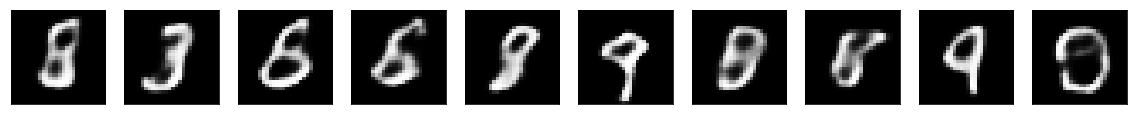

2000 [D loss: 0.641083, acc.: 60.94%] [G loss: 0.834720]
2001 [D loss: 0.664289, acc.: 58.59%] [G loss: 0.878840]
2002 [D loss: 0.656417, acc.: 57.03%] [G loss: 0.921782]
2003 [D loss: 0.654272, acc.: 60.16%] [G loss: 0.869082]
2004 [D loss: 0.632500, acc.: 67.97%] [G loss: 0.879020]
2005 [D loss: 0.629014, acc.: 64.06%] [G loss: 0.869130]
2006 [D loss: 0.652041, acc.: 57.81%] [G loss: 0.856620]
2007 [D loss: 0.647630, acc.: 65.62%] [G loss: 0.880662]
2008 [D loss: 0.654086, acc.: 56.25%] [G loss: 0.891613]
2009 [D loss: 0.646059, acc.: 60.94%] [G loss: 0.939666]
2010 [D loss: 0.641917, acc.: 64.06%] [G loss: 0.900898]
2011 [D loss: 0.633983, acc.: 71.09%] [G loss: 0.937683]
2012 [D loss: 0.621183, acc.: 72.66%] [G loss: 0.949634]
2013 [D loss: 0.646355, acc.: 65.62%] [G loss: 0.981760]
2014 [D loss: 0.659907, acc.: 65.62%] [G loss: 0.871046]
2015 [D loss: 0.661215, acc.: 57.03%] [G loss: 0.948788]
2016 [D loss: 0.663868, acc.: 57.81%] [G loss: 0.947364]
2017 [D loss: 0.650790, acc.: 6

2144 [D loss: 0.653665, acc.: 62.50%] [G loss: 0.892128]
2145 [D loss: 0.636206, acc.: 71.09%] [G loss: 0.841423]
2146 [D loss: 0.649629, acc.: 64.84%] [G loss: 0.910518]
2147 [D loss: 0.643807, acc.: 64.06%] [G loss: 0.895008]
2148 [D loss: 0.642885, acc.: 66.41%] [G loss: 0.872716]
2149 [D loss: 0.616652, acc.: 74.22%] [G loss: 0.840547]
2150 [D loss: 0.636769, acc.: 69.53%] [G loss: 0.871693]
2151 [D loss: 0.647433, acc.: 68.75%] [G loss: 0.876112]
2152 [D loss: 0.638943, acc.: 57.03%] [G loss: 0.922264]
2153 [D loss: 0.637969, acc.: 62.50%] [G loss: 0.907452]
2154 [D loss: 0.662416, acc.: 63.28%] [G loss: 1.000077]
2155 [D loss: 0.676622, acc.: 54.69%] [G loss: 0.863055]
2156 [D loss: 0.643760, acc.: 65.62%] [G loss: 0.883704]
2157 [D loss: 0.633043, acc.: 67.97%] [G loss: 0.860243]
2158 [D loss: 0.649501, acc.: 61.72%] [G loss: 0.902919]
2159 [D loss: 0.657240, acc.: 60.94%] [G loss: 0.912818]
2160 [D loss: 0.635165, acc.: 67.19%] [G loss: 0.960272]
2161 [D loss: 0.644927, acc.: 6

2288 [D loss: 0.649090, acc.: 67.19%] [G loss: 0.825723]
2289 [D loss: 0.627708, acc.: 65.62%] [G loss: 0.852917]
2290 [D loss: 0.635635, acc.: 68.75%] [G loss: 0.855279]
2291 [D loss: 0.643773, acc.: 64.06%] [G loss: 0.866279]
2292 [D loss: 0.618367, acc.: 68.75%] [G loss: 0.838742]
2293 [D loss: 0.658814, acc.: 60.16%] [G loss: 0.849987]
2294 [D loss: 0.631573, acc.: 64.06%] [G loss: 0.884422]
2295 [D loss: 0.622939, acc.: 70.31%] [G loss: 0.960437]
2296 [D loss: 0.670274, acc.: 57.03%] [G loss: 0.920439]
2297 [D loss: 0.661486, acc.: 58.59%] [G loss: 0.929673]
2298 [D loss: 0.656579, acc.: 58.59%] [G loss: 0.842925]
2299 [D loss: 0.629635, acc.: 68.75%] [G loss: 0.839992]
2300 [D loss: 0.634599, acc.: 67.97%] [G loss: 0.837682]
2301 [D loss: 0.626794, acc.: 62.50%] [G loss: 0.821032]
2302 [D loss: 0.622442, acc.: 74.22%] [G loss: 0.834860]
2303 [D loss: 0.644117, acc.: 60.94%] [G loss: 0.904394]
2304 [D loss: 0.636938, acc.: 64.84%] [G loss: 0.925045]
2305 [D loss: 0.640341, acc.: 6

2434 [D loss: 0.633424, acc.: 67.19%] [G loss: 0.852371]
2435 [D loss: 0.652999, acc.: 65.62%] [G loss: 0.847372]
2436 [D loss: 0.657948, acc.: 61.72%] [G loss: 0.844135]
2437 [D loss: 0.636447, acc.: 64.06%] [G loss: 0.876357]
2438 [D loss: 0.658868, acc.: 58.59%] [G loss: 0.954403]
2439 [D loss: 0.640919, acc.: 62.50%] [G loss: 0.969250]
2440 [D loss: 0.657541, acc.: 62.50%] [G loss: 0.839662]
2441 [D loss: 0.628983, acc.: 66.41%] [G loss: 0.825205]
2442 [D loss: 0.631004, acc.: 66.41%] [G loss: 0.856269]
2443 [D loss: 0.667353, acc.: 59.38%] [G loss: 0.815923]
2444 [D loss: 0.663779, acc.: 60.16%] [G loss: 0.832165]
2445 [D loss: 0.653933, acc.: 61.72%] [G loss: 0.946659]
2446 [D loss: 0.656502, acc.: 63.28%] [G loss: 0.904114]
2447 [D loss: 0.658051, acc.: 61.72%] [G loss: 1.015572]
2448 [D loss: 0.650197, acc.: 63.28%] [G loss: 0.886945]
2449 [D loss: 0.631097, acc.: 65.62%] [G loss: 0.849786]
2450 [D loss: 0.635740, acc.: 67.97%] [G loss: 0.835962]
2451 [D loss: 0.632712, acc.: 6

2581 [D loss: 0.626283, acc.: 62.50%] [G loss: 0.880291]
2582 [D loss: 0.667285, acc.: 63.28%] [G loss: 0.860171]
2583 [D loss: 0.610294, acc.: 70.31%] [G loss: 0.843864]
2584 [D loss: 0.661381, acc.: 57.81%] [G loss: 0.868217]
2585 [D loss: 0.643908, acc.: 61.72%] [G loss: 0.942081]
2586 [D loss: 0.674403, acc.: 59.38%] [G loss: 0.886464]
2587 [D loss: 0.622135, acc.: 72.66%] [G loss: 0.904480]
2588 [D loss: 0.629671, acc.: 70.31%] [G loss: 0.980376]
2589 [D loss: 0.617036, acc.: 67.19%] [G loss: 0.972466]
2590 [D loss: 0.639208, acc.: 60.94%] [G loss: 0.858121]
2591 [D loss: 0.627245, acc.: 67.19%] [G loss: 0.875329]
2592 [D loss: 0.644308, acc.: 66.41%] [G loss: 0.885360]
2593 [D loss: 0.651568, acc.: 64.84%] [G loss: 0.881713]
2594 [D loss: 0.622827, acc.: 71.88%] [G loss: 0.869377]
2595 [D loss: 0.642019, acc.: 60.94%] [G loss: 0.894804]
2596 [D loss: 0.643462, acc.: 60.16%] [G loss: 0.857598]
2597 [D loss: 0.658629, acc.: 60.16%] [G loss: 0.934044]
2598 [D loss: 0.635813, acc.: 6

2728 [D loss: 0.620216, acc.: 66.41%] [G loss: 0.920299]
2729 [D loss: 0.671775, acc.: 60.16%] [G loss: 0.952938]
2730 [D loss: 0.645908, acc.: 59.38%] [G loss: 0.986539]
2731 [D loss: 0.632927, acc.: 66.41%] [G loss: 0.876050]
2732 [D loss: 0.652407, acc.: 56.25%] [G loss: 0.828751]
2733 [D loss: 0.635409, acc.: 62.50%] [G loss: 0.866248]
2734 [D loss: 0.624073, acc.: 68.75%] [G loss: 0.916070]
2735 [D loss: 0.626169, acc.: 67.19%] [G loss: 0.942395]
2736 [D loss: 0.676416, acc.: 58.59%] [G loss: 0.887285]
2737 [D loss: 0.637543, acc.: 64.06%] [G loss: 0.909532]
2738 [D loss: 0.652317, acc.: 64.84%] [G loss: 0.940783]
2739 [D loss: 0.637757, acc.: 57.81%] [G loss: 1.082469]
2740 [D loss: 0.666481, acc.: 57.03%] [G loss: 0.861339]
2741 [D loss: 0.630896, acc.: 64.06%] [G loss: 0.865469]
2742 [D loss: 0.648509, acc.: 60.94%] [G loss: 0.890187]
2743 [D loss: 0.640297, acc.: 64.06%] [G loss: 1.015236]
2744 [D loss: 0.665647, acc.: 59.38%] [G loss: 0.869070]
2745 [D loss: 0.634055, acc.: 6

2876 [D loss: 0.619739, acc.: 66.41%] [G loss: 0.825665]
2877 [D loss: 0.618698, acc.: 68.75%] [G loss: 0.828000]
2878 [D loss: 0.622308, acc.: 65.62%] [G loss: 0.840541]
2879 [D loss: 0.616622, acc.: 69.53%] [G loss: 0.823224]
2880 [D loss: 0.605422, acc.: 67.97%] [G loss: 0.870815]
2881 [D loss: 0.632659, acc.: 62.50%] [G loss: 0.972002]
2882 [D loss: 0.610713, acc.: 67.97%] [G loss: 0.871589]
2883 [D loss: 0.644261, acc.: 59.38%] [G loss: 0.898299]
2884 [D loss: 0.640769, acc.: 69.53%] [G loss: 0.835303]
2885 [D loss: 0.618511, acc.: 67.19%] [G loss: 0.882287]
2886 [D loss: 0.656421, acc.: 62.50%] [G loss: 0.928617]
2887 [D loss: 0.629183, acc.: 64.06%] [G loss: 1.016867]
2888 [D loss: 0.656690, acc.: 58.59%] [G loss: 0.852810]
2889 [D loss: 0.608902, acc.: 71.09%] [G loss: 0.938557]
2890 [D loss: 0.637599, acc.: 61.72%] [G loss: 1.014032]
2891 [D loss: 0.615199, acc.: 66.41%] [G loss: 1.001690]
2892 [D loss: 0.652395, acc.: 57.81%] [G loss: 0.831602]
2893 [D loss: 0.640676, acc.: 6

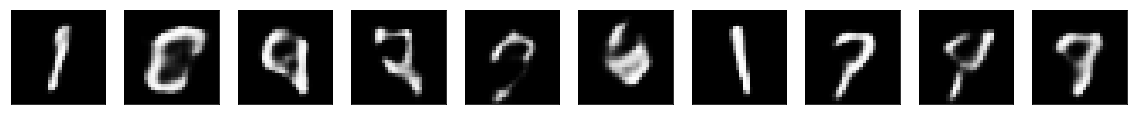

3000 [D loss: 0.645719, acc.: 61.72%] [G loss: 0.906706]
3001 [D loss: 0.656218, acc.: 60.16%] [G loss: 0.922520]
3002 [D loss: 0.633749, acc.: 62.50%] [G loss: 1.057784]
3003 [D loss: 0.659847, acc.: 61.72%] [G loss: 0.930829]
3004 [D loss: 0.634500, acc.: 59.38%] [G loss: 0.889432]
3005 [D loss: 0.643872, acc.: 60.94%] [G loss: 0.840057]
3006 [D loss: 0.632620, acc.: 61.72%] [G loss: 0.866234]
3007 [D loss: 0.650138, acc.: 63.28%] [G loss: 0.868275]
3008 [D loss: 0.630703, acc.: 61.72%] [G loss: 0.854935]
3009 [D loss: 0.637845, acc.: 67.97%] [G loss: 0.880338]
3010 [D loss: 0.611795, acc.: 67.19%] [G loss: 0.852763]
3011 [D loss: 0.630624, acc.: 67.97%] [G loss: 0.867796]
3012 [D loss: 0.634872, acc.: 60.94%] [G loss: 0.892304]
3013 [D loss: 0.643077, acc.: 61.72%] [G loss: 0.969736]
3014 [D loss: 0.608176, acc.: 66.41%] [G loss: 1.129254]
3015 [D loss: 0.657565, acc.: 61.72%] [G loss: 0.867031]
3016 [D loss: 0.651908, acc.: 58.59%] [G loss: 0.953322]
3017 [D loss: 0.646927, acc.: 6

3147 [D loss: 0.635070, acc.: 68.75%] [G loss: 0.959156]
3148 [D loss: 0.654511, acc.: 60.94%] [G loss: 1.042475]
3149 [D loss: 0.676352, acc.: 56.25%] [G loss: 0.881034]
3150 [D loss: 0.655660, acc.: 59.38%] [G loss: 0.835863]
3151 [D loss: 0.663014, acc.: 60.16%] [G loss: 0.861088]
3152 [D loss: 0.625925, acc.: 66.41%] [G loss: 0.849574]
3153 [D loss: 0.624326, acc.: 72.66%] [G loss: 0.859417]
3154 [D loss: 0.603542, acc.: 71.88%] [G loss: 0.854365]
3155 [D loss: 0.641995, acc.: 64.06%] [G loss: 0.932970]
3156 [D loss: 0.670951, acc.: 58.59%] [G loss: 0.868682]
3157 [D loss: 0.645949, acc.: 68.75%] [G loss: 0.914774]
3158 [D loss: 0.638519, acc.: 64.84%] [G loss: 0.908930]
3159 [D loss: 0.636933, acc.: 65.62%] [G loss: 0.901953]
3160 [D loss: 0.614321, acc.: 66.41%] [G loss: 0.958140]
3161 [D loss: 0.599683, acc.: 70.31%] [G loss: 0.979695]
3162 [D loss: 0.657540, acc.: 62.50%] [G loss: 0.919625]
3163 [D loss: 0.614075, acc.: 65.62%] [G loss: 0.961532]
3164 [D loss: 0.601079, acc.: 7

3298 [D loss: 0.678000, acc.: 61.72%] [G loss: 0.905107]
3299 [D loss: 0.652321, acc.: 61.72%] [G loss: 0.943217]
3300 [D loss: 0.662952, acc.: 58.59%] [G loss: 1.051389]
3301 [D loss: 0.666942, acc.: 60.94%] [G loss: 0.997149]
3302 [D loss: 0.635112, acc.: 60.16%] [G loss: 1.020221]
3303 [D loss: 0.638239, acc.: 64.06%] [G loss: 0.851737]
3304 [D loss: 0.645546, acc.: 69.53%] [G loss: 0.847611]
3305 [D loss: 0.643823, acc.: 67.97%] [G loss: 0.880117]
3306 [D loss: 0.649873, acc.: 67.97%] [G loss: 0.906935]
3307 [D loss: 0.650588, acc.: 64.06%] [G loss: 0.869257]
3308 [D loss: 0.658977, acc.: 62.50%] [G loss: 0.849791]
3309 [D loss: 0.615896, acc.: 63.28%] [G loss: 0.932712]
3310 [D loss: 0.631700, acc.: 64.06%] [G loss: 1.026342]
3311 [D loss: 0.669152, acc.: 57.03%] [G loss: 0.958993]
3312 [D loss: 0.616497, acc.: 66.41%] [G loss: 0.982921]
3313 [D loss: 0.664688, acc.: 59.38%] [G loss: 0.869440]
3314 [D loss: 0.638586, acc.: 61.72%] [G loss: 0.901176]
3315 [D loss: 0.621649, acc.: 6

3447 [D loss: 0.651280, acc.: 61.72%] [G loss: 0.932286]
3448 [D loss: 0.624185, acc.: 64.06%] [G loss: 0.943899]
3449 [D loss: 0.601625, acc.: 61.72%] [G loss: 0.989495]
3450 [D loss: 0.650769, acc.: 60.94%] [G loss: 0.885321]
3451 [D loss: 0.651685, acc.: 60.94%] [G loss: 0.847055]
3452 [D loss: 0.610976, acc.: 68.75%] [G loss: 0.855645]
3453 [D loss: 0.669465, acc.: 57.03%] [G loss: 0.847363]
3454 [D loss: 0.627622, acc.: 70.31%] [G loss: 0.858264]
3455 [D loss: 0.658723, acc.: 60.16%] [G loss: 0.888439]
3456 [D loss: 0.624005, acc.: 71.09%] [G loss: 0.942176]
3457 [D loss: 0.641235, acc.: 63.28%] [G loss: 0.844612]
3458 [D loss: 0.628766, acc.: 67.19%] [G loss: 0.850545]
3459 [D loss: 0.631054, acc.: 66.41%] [G loss: 0.834288]
3460 [D loss: 0.618187, acc.: 67.97%] [G loss: 0.839105]
3461 [D loss: 0.637535, acc.: 71.09%] [G loss: 0.885286]
3462 [D loss: 0.652358, acc.: 59.38%] [G loss: 0.857608]
3463 [D loss: 0.637045, acc.: 64.84%] [G loss: 0.889178]
3464 [D loss: 0.624006, acc.: 6

3595 [D loss: 0.608834, acc.: 67.97%] [G loss: 0.884980]
3596 [D loss: 0.639207, acc.: 63.28%] [G loss: 0.877506]
3597 [D loss: 0.633345, acc.: 68.75%] [G loss: 0.886663]
3598 [D loss: 0.605594, acc.: 70.31%] [G loss: 0.889631]
3599 [D loss: 0.603019, acc.: 67.19%] [G loss: 0.878181]
3600 [D loss: 0.656198, acc.: 64.84%] [G loss: 0.895073]
3601 [D loss: 0.628240, acc.: 59.38%] [G loss: 0.919882]
3602 [D loss: 0.657412, acc.: 60.94%] [G loss: 0.913963]
3603 [D loss: 0.652362, acc.: 57.81%] [G loss: 0.905136]
3604 [D loss: 0.625998, acc.: 70.31%] [G loss: 0.811156]
3605 [D loss: 0.632764, acc.: 64.06%] [G loss: 0.875232]
3606 [D loss: 0.610688, acc.: 67.19%] [G loss: 0.885213]
3607 [D loss: 0.649439, acc.: 62.50%] [G loss: 0.895188]
3608 [D loss: 0.640362, acc.: 62.50%] [G loss: 0.846678]
3609 [D loss: 0.636547, acc.: 67.19%] [G loss: 0.882613]
3610 [D loss: 0.652251, acc.: 66.41%] [G loss: 0.896435]
3611 [D loss: 0.609646, acc.: 74.22%] [G loss: 0.856209]
3612 [D loss: 0.601323, acc.: 7

3742 [D loss: 0.603459, acc.: 65.62%] [G loss: 0.857537]
3743 [D loss: 0.625382, acc.: 68.75%] [G loss: 0.861564]
3744 [D loss: 0.630685, acc.: 67.19%] [G loss: 0.834614]
3745 [D loss: 0.623957, acc.: 68.75%] [G loss: 0.864624]
3746 [D loss: 0.647281, acc.: 62.50%] [G loss: 0.864332]
3747 [D loss: 0.646245, acc.: 59.38%] [G loss: 0.911682]
3748 [D loss: 0.671755, acc.: 57.81%] [G loss: 0.889211]
3749 [D loss: 0.660601, acc.: 58.59%] [G loss: 0.943639]
3750 [D loss: 0.671419, acc.: 59.38%] [G loss: 0.855271]
3751 [D loss: 0.661534, acc.: 58.59%] [G loss: 0.839010]
3752 [D loss: 0.640861, acc.: 59.38%] [G loss: 0.831125]
3753 [D loss: 0.613411, acc.: 72.66%] [G loss: 0.916656]
3754 [D loss: 0.642726, acc.: 63.28%] [G loss: 0.934062]
3755 [D loss: 0.629972, acc.: 65.62%] [G loss: 0.951137]
3756 [D loss: 0.671533, acc.: 55.47%] [G loss: 0.833063]
3757 [D loss: 0.628210, acc.: 64.84%] [G loss: 0.835090]
3758 [D loss: 0.641695, acc.: 67.97%] [G loss: 0.852499]
3759 [D loss: 0.660625, acc.: 6

3887 [D loss: 0.617500, acc.: 61.72%] [G loss: 0.899875]
3888 [D loss: 0.651709, acc.: 62.50%] [G loss: 0.923732]
3889 [D loss: 0.652303, acc.: 63.28%] [G loss: 0.953012]
3890 [D loss: 0.612333, acc.: 66.41%] [G loss: 1.063241]
3891 [D loss: 0.654875, acc.: 63.28%] [G loss: 0.921427]
3892 [D loss: 0.673651, acc.: 55.47%] [G loss: 0.921762]
3893 [D loss: 0.663934, acc.: 61.72%] [G loss: 0.854912]
3894 [D loss: 0.631918, acc.: 65.62%] [G loss: 0.882166]
3895 [D loss: 0.676466, acc.: 55.47%] [G loss: 0.900489]
3896 [D loss: 0.613720, acc.: 70.31%] [G loss: 0.872194]
3897 [D loss: 0.628071, acc.: 62.50%] [G loss: 0.946142]
3898 [D loss: 0.646414, acc.: 59.38%] [G loss: 0.901408]
3899 [D loss: 0.616555, acc.: 66.41%] [G loss: 1.009089]
3900 [D loss: 0.666642, acc.: 58.59%] [G loss: 0.945001]
3901 [D loss: 0.639614, acc.: 63.28%] [G loss: 0.971513]
3902 [D loss: 0.651718, acc.: 60.94%] [G loss: 0.932608]
3903 [D loss: 0.634434, acc.: 62.50%] [G loss: 0.937081]
3904 [D loss: 0.653654, acc.: 6

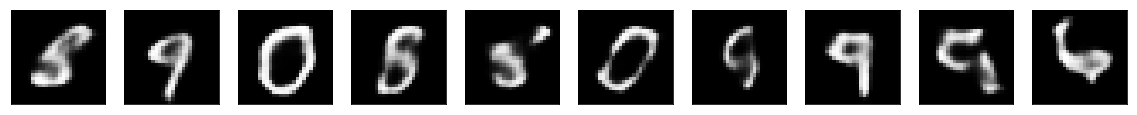

4000 [D loss: 0.619467, acc.: 67.19%] [G loss: 0.867343]
4001 [D loss: 0.664043, acc.: 53.12%] [G loss: 0.837507]
4002 [D loss: 0.633068, acc.: 71.09%] [G loss: 0.858852]
4003 [D loss: 0.591883, acc.: 66.41%] [G loss: 0.856909]
4004 [D loss: 0.628990, acc.: 60.16%] [G loss: 0.860461]
4005 [D loss: 0.627016, acc.: 63.28%] [G loss: 0.882603]
4006 [D loss: 0.640958, acc.: 62.50%] [G loss: 0.951314]
4007 [D loss: 0.636523, acc.: 64.06%] [G loss: 0.882737]
4008 [D loss: 0.666136, acc.: 62.50%] [G loss: 0.842117]
4009 [D loss: 0.601613, acc.: 66.41%] [G loss: 0.854251]
4010 [D loss: 0.656088, acc.: 61.72%] [G loss: 0.836737]
4011 [D loss: 0.663266, acc.: 59.38%] [G loss: 0.874483]
4012 [D loss: 0.641312, acc.: 66.41%] [G loss: 0.862873]
4013 [D loss: 0.628613, acc.: 68.75%] [G loss: 0.869797]
4014 [D loss: 0.634621, acc.: 68.75%] [G loss: 0.882954]
4015 [D loss: 0.639402, acc.: 69.53%] [G loss: 0.875370]
4016 [D loss: 0.665869, acc.: 56.25%] [G loss: 0.882637]
4017 [D loss: 0.655856, acc.: 5

4147 [D loss: 0.633332, acc.: 66.41%] [G loss: 0.992678]
4148 [D loss: 0.632495, acc.: 66.41%] [G loss: 0.869571]
4149 [D loss: 0.604741, acc.: 68.75%] [G loss: 0.849821]
4150 [D loss: 0.638827, acc.: 60.94%] [G loss: 0.835985]
4151 [D loss: 0.645260, acc.: 62.50%] [G loss: 0.862658]
4152 [D loss: 0.638217, acc.: 59.38%] [G loss: 0.879783]
4153 [D loss: 0.633224, acc.: 61.72%] [G loss: 0.896090]
4154 [D loss: 0.674365, acc.: 60.16%] [G loss: 0.920416]
4155 [D loss: 0.627021, acc.: 63.28%] [G loss: 0.934653]
4156 [D loss: 0.647893, acc.: 65.62%] [G loss: 0.931095]
4157 [D loss: 0.630057, acc.: 63.28%] [G loss: 0.961607]
4158 [D loss: 0.658957, acc.: 57.81%] [G loss: 0.891261]
4159 [D loss: 0.620493, acc.: 66.41%] [G loss: 0.899615]
4160 [D loss: 0.619774, acc.: 63.28%] [G loss: 0.935197]
4161 [D loss: 0.622344, acc.: 64.06%] [G loss: 0.948714]
4162 [D loss: 0.680509, acc.: 56.25%] [G loss: 0.896318]
4163 [D loss: 0.650943, acc.: 60.16%] [G loss: 0.943924]
4164 [D loss: 0.674777, acc.: 6

4297 [D loss: 0.640864, acc.: 60.16%] [G loss: 0.855672]
4298 [D loss: 0.636301, acc.: 63.28%] [G loss: 0.879635]
4299 [D loss: 0.618517, acc.: 67.97%] [G loss: 0.894453]
4300 [D loss: 0.644852, acc.: 64.84%] [G loss: 0.883629]
4301 [D loss: 0.642800, acc.: 62.50%] [G loss: 0.887870]
4302 [D loss: 0.628225, acc.: 63.28%] [G loss: 0.876168]
4303 [D loss: 0.623082, acc.: 65.62%] [G loss: 0.855407]
4304 [D loss: 0.617874, acc.: 68.75%] [G loss: 0.862747]
4305 [D loss: 0.637191, acc.: 64.06%] [G loss: 0.857481]
4306 [D loss: 0.614229, acc.: 67.97%] [G loss: 0.867486]
4307 [D loss: 0.640894, acc.: 68.75%] [G loss: 0.892747]
4308 [D loss: 0.646559, acc.: 66.41%] [G loss: 0.889606]
4309 [D loss: 0.660799, acc.: 59.38%] [G loss: 0.872643]
4310 [D loss: 0.618308, acc.: 64.84%] [G loss: 0.863883]
4311 [D loss: 0.612649, acc.: 76.56%] [G loss: 0.873134]
4312 [D loss: 0.615891, acc.: 70.31%] [G loss: 0.909020]
4313 [D loss: 0.607754, acc.: 71.09%] [G loss: 0.904954]
4314 [D loss: 0.624903, acc.: 6

4443 [D loss: 0.659894, acc.: 60.94%] [G loss: 0.832547]
4444 [D loss: 0.637757, acc.: 58.59%] [G loss: 0.878539]
4445 [D loss: 0.662384, acc.: 64.84%] [G loss: 0.867308]
4446 [D loss: 0.619621, acc.: 70.31%] [G loss: 0.828635]
4447 [D loss: 0.610012, acc.: 72.66%] [G loss: 0.865455]
4448 [D loss: 0.630008, acc.: 62.50%] [G loss: 0.854664]
4449 [D loss: 0.601913, acc.: 66.41%] [G loss: 0.852625]
4450 [D loss: 0.626195, acc.: 67.19%] [G loss: 0.853935]
4451 [D loss: 0.613238, acc.: 72.66%] [G loss: 0.858962]
4452 [D loss: 0.631250, acc.: 66.41%] [G loss: 0.840777]
4453 [D loss: 0.648936, acc.: 67.19%] [G loss: 0.847767]
4454 [D loss: 0.619337, acc.: 73.44%] [G loss: 0.814622]
4455 [D loss: 0.625983, acc.: 68.75%] [G loss: 0.838132]
4456 [D loss: 0.628440, acc.: 70.31%] [G loss: 0.853268]
4457 [D loss: 0.633139, acc.: 64.84%] [G loss: 0.834213]
4458 [D loss: 0.627017, acc.: 64.84%] [G loss: 0.821292]
4459 [D loss: 0.637564, acc.: 67.97%] [G loss: 0.848277]
4460 [D loss: 0.629413, acc.: 6

4592 [D loss: 0.644350, acc.: 60.16%] [G loss: 0.903601]
4593 [D loss: 0.615033, acc.: 64.84%] [G loss: 0.908218]
4594 [D loss: 0.592840, acc.: 71.09%] [G loss: 0.898087]
4595 [D loss: 0.647747, acc.: 58.59%] [G loss: 0.901696]
4596 [D loss: 0.628476, acc.: 67.97%] [G loss: 0.838798]
4597 [D loss: 0.646203, acc.: 64.06%] [G loss: 0.878874]
4598 [D loss: 0.641786, acc.: 66.41%] [G loss: 0.865276]
4599 [D loss: 0.644027, acc.: 64.84%] [G loss: 0.897099]
4600 [D loss: 0.614600, acc.: 67.19%] [G loss: 0.857808]
4601 [D loss: 0.656256, acc.: 62.50%] [G loss: 0.893038]
4602 [D loss: 0.632816, acc.: 64.06%] [G loss: 0.907537]
4603 [D loss: 0.601453, acc.: 69.53%] [G loss: 0.850667]
4604 [D loss: 0.643931, acc.: 66.41%] [G loss: 0.899926]
4605 [D loss: 0.637130, acc.: 67.19%] [G loss: 0.910178]
4606 [D loss: 0.645371, acc.: 60.94%] [G loss: 0.855963]
4607 [D loss: 0.628842, acc.: 69.53%] [G loss: 0.849908]
4608 [D loss: 0.629665, acc.: 65.62%] [G loss: 0.875193]
4609 [D loss: 0.629693, acc.: 7

4739 [D loss: 0.622434, acc.: 70.31%] [G loss: 0.862152]
4740 [D loss: 0.637393, acc.: 69.53%] [G loss: 0.889728]
4741 [D loss: 0.617226, acc.: 72.66%] [G loss: 0.868644]
4742 [D loss: 0.656289, acc.: 59.38%] [G loss: 0.845335]
4743 [D loss: 0.603798, acc.: 70.31%] [G loss: 0.861924]
4744 [D loss: 0.632366, acc.: 67.97%] [G loss: 0.873918]
4745 [D loss: 0.636347, acc.: 65.62%] [G loss: 0.971116]
4746 [D loss: 0.642616, acc.: 64.84%] [G loss: 0.959718]
4747 [D loss: 0.670364, acc.: 53.91%] [G loss: 0.919010]
4748 [D loss: 0.607739, acc.: 77.34%] [G loss: 0.850156]
4749 [D loss: 0.657192, acc.: 58.59%] [G loss: 0.858279]
4750 [D loss: 0.602400, acc.: 72.66%] [G loss: 0.884943]
4751 [D loss: 0.662489, acc.: 57.03%] [G loss: 0.978472]
4752 [D loss: 0.633838, acc.: 65.62%] [G loss: 0.966525]
4753 [D loss: 0.646390, acc.: 61.72%] [G loss: 0.839509]
4754 [D loss: 0.630396, acc.: 68.75%] [G loss: 0.947207]
4755 [D loss: 0.640130, acc.: 64.06%] [G loss: 0.897897]
4756 [D loss: 0.659237, acc.: 7

4883 [D loss: 0.621953, acc.: 62.50%] [G loss: 0.871338]
4884 [D loss: 0.653694, acc.: 59.38%] [G loss: 0.891672]
4885 [D loss: 0.633094, acc.: 64.06%] [G loss: 0.873802]
4886 [D loss: 0.590564, acc.: 76.56%] [G loss: 0.877803]
4887 [D loss: 0.613679, acc.: 71.88%] [G loss: 0.892754]
4888 [D loss: 0.627989, acc.: 66.41%] [G loss: 0.906419]
4889 [D loss: 0.626621, acc.: 64.06%] [G loss: 0.895567]
4890 [D loss: 0.624749, acc.: 63.28%] [G loss: 0.975016]
4891 [D loss: 0.634469, acc.: 60.16%] [G loss: 0.906871]
4892 [D loss: 0.631248, acc.: 63.28%] [G loss: 0.944767]
4893 [D loss: 0.595662, acc.: 69.53%] [G loss: 0.839843]
4894 [D loss: 0.633715, acc.: 64.84%] [G loss: 0.841403]
4895 [D loss: 0.624681, acc.: 71.09%] [G loss: 0.838782]
4896 [D loss: 0.671927, acc.: 57.81%] [G loss: 0.886619]
4897 [D loss: 0.631035, acc.: 68.75%] [G loss: 0.871750]
4898 [D loss: 0.646537, acc.: 64.06%] [G loss: 0.830566]
4899 [D loss: 0.604209, acc.: 70.31%] [G loss: 0.832652]
4900 [D loss: 0.640674, acc.: 6

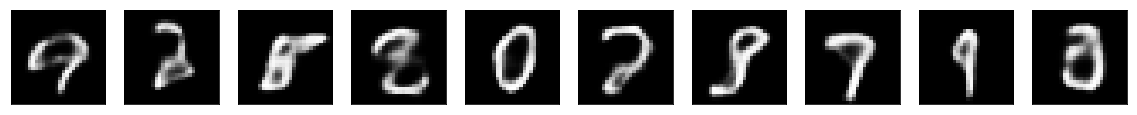

5000 [D loss: 0.648990, acc.: 58.59%] [G loss: 0.869686]
5001 [D loss: 0.629598, acc.: 67.97%] [G loss: 0.873513]
5002 [D loss: 0.663468, acc.: 60.94%] [G loss: 0.903706]
5003 [D loss: 0.656791, acc.: 60.94%] [G loss: 0.887811]
5004 [D loss: 0.650268, acc.: 64.06%] [G loss: 0.886779]
5005 [D loss: 0.634667, acc.: 65.62%] [G loss: 0.888793]
5006 [D loss: 0.654594, acc.: 57.03%] [G loss: 0.873334]
5007 [D loss: 0.615293, acc.: 67.19%] [G loss: 0.878823]
5008 [D loss: 0.611470, acc.: 62.50%] [G loss: 0.910671]
5009 [D loss: 0.623694, acc.: 64.84%] [G loss: 0.889890]
5010 [D loss: 0.619929, acc.: 57.81%] [G loss: 0.892365]
5011 [D loss: 0.662590, acc.: 66.41%] [G loss: 0.886003]
5012 [D loss: 0.645499, acc.: 56.25%] [G loss: 0.960773]
5013 [D loss: 0.622964, acc.: 68.75%] [G loss: 0.892802]
5014 [D loss: 0.655480, acc.: 64.84%] [G loss: 0.892105]
5015 [D loss: 0.657176, acc.: 64.84%] [G loss: 0.918185]
5016 [D loss: 0.647967, acc.: 61.72%] [G loss: 0.898227]
5017 [D loss: 0.631791, acc.: 6

5146 [D loss: 0.632100, acc.: 64.06%] [G loss: 0.913226]
5147 [D loss: 0.657579, acc.: 63.28%] [G loss: 0.965380]
5148 [D loss: 0.660100, acc.: 64.06%] [G loss: 0.903212]
5149 [D loss: 0.617144, acc.: 61.72%] [G loss: 0.910247]
5150 [D loss: 0.646410, acc.: 58.59%] [G loss: 0.880902]
5151 [D loss: 0.609901, acc.: 70.31%] [G loss: 0.893944]
5152 [D loss: 0.624903, acc.: 67.19%] [G loss: 0.898592]
5153 [D loss: 0.590782, acc.: 74.22%] [G loss: 1.004811]
5154 [D loss: 0.649512, acc.: 62.50%] [G loss: 0.920547]
5155 [D loss: 0.618488, acc.: 69.53%] [G loss: 0.950990]
5156 [D loss: 0.657036, acc.: 60.16%] [G loss: 0.872019]
5157 [D loss: 0.620293, acc.: 68.75%] [G loss: 0.884494]
5158 [D loss: 0.628877, acc.: 67.97%] [G loss: 0.894054]
5159 [D loss: 0.609573, acc.: 71.88%] [G loss: 0.866394]
5160 [D loss: 0.643015, acc.: 56.25%] [G loss: 0.837258]
5161 [D loss: 0.640514, acc.: 62.50%] [G loss: 0.906462]
5162 [D loss: 0.660301, acc.: 59.38%] [G loss: 0.850198]
5163 [D loss: 0.658091, acc.: 6

5293 [D loss: 0.615890, acc.: 70.31%] [G loss: 0.931282]
5294 [D loss: 0.617334, acc.: 62.50%] [G loss: 0.966715]
5295 [D loss: 0.614185, acc.: 65.62%] [G loss: 0.908473]
5296 [D loss: 0.622837, acc.: 70.31%] [G loss: 0.841696]
5297 [D loss: 0.593989, acc.: 72.66%] [G loss: 0.913351]
5298 [D loss: 0.672531, acc.: 55.47%] [G loss: 0.889205]
5299 [D loss: 0.652318, acc.: 60.94%] [G loss: 0.851340]
5300 [D loss: 0.631560, acc.: 66.41%] [G loss: 0.846441]
5301 [D loss: 0.605316, acc.: 68.75%] [G loss: 0.896491]
5302 [D loss: 0.633726, acc.: 62.50%] [G loss: 0.902889]
5303 [D loss: 0.666013, acc.: 56.25%] [G loss: 0.944622]
5304 [D loss: 0.628243, acc.: 61.72%] [G loss: 0.882156]
5305 [D loss: 0.609113, acc.: 67.97%] [G loss: 0.829880]
5306 [D loss: 0.622316, acc.: 67.97%] [G loss: 0.845698]
5307 [D loss: 0.623935, acc.: 68.75%] [G loss: 0.879661]
5308 [D loss: 0.593076, acc.: 71.09%] [G loss: 0.879020]
5309 [D loss: 0.641280, acc.: 59.38%] [G loss: 0.868807]
5310 [D loss: 0.615975, acc.: 7

5443 [D loss: 0.605356, acc.: 67.97%] [G loss: 0.895426]
5444 [D loss: 0.653219, acc.: 61.72%] [G loss: 0.925067]
5445 [D loss: 0.653510, acc.: 57.03%] [G loss: 1.076830]
5446 [D loss: 0.634057, acc.: 67.19%] [G loss: 0.845837]
5447 [D loss: 0.639585, acc.: 66.41%] [G loss: 0.835228]
5448 [D loss: 0.633608, acc.: 67.97%] [G loss: 0.841895]
5449 [D loss: 0.640607, acc.: 68.75%] [G loss: 0.910215]
5450 [D loss: 0.633026, acc.: 60.16%] [G loss: 0.911399]
5451 [D loss: 0.614363, acc.: 70.31%] [G loss: 0.877429]
5452 [D loss: 0.614810, acc.: 69.53%] [G loss: 0.859123]
5453 [D loss: 0.649341, acc.: 61.72%] [G loss: 0.929760]
5454 [D loss: 0.628080, acc.: 60.94%] [G loss: 0.970885]
5455 [D loss: 0.635823, acc.: 63.28%] [G loss: 1.066543]
5456 [D loss: 0.691167, acc.: 57.03%] [G loss: 0.877236]
5457 [D loss: 0.645158, acc.: 58.59%] [G loss: 0.909933]
5458 [D loss: 0.632290, acc.: 69.53%] [G loss: 0.893291]
5459 [D loss: 0.616170, acc.: 65.62%] [G loss: 0.973757]
5460 [D loss: 0.660230, acc.: 5

5589 [D loss: 0.631145, acc.: 67.97%] [G loss: 0.872097]
5590 [D loss: 0.639619, acc.: 64.84%] [G loss: 0.879298]
5591 [D loss: 0.650914, acc.: 57.03%] [G loss: 0.922554]
5592 [D loss: 0.666555, acc.: 57.03%] [G loss: 0.955063]
5593 [D loss: 0.637707, acc.: 58.59%] [G loss: 1.004534]
5594 [D loss: 0.642621, acc.: 61.72%] [G loss: 0.940122]
5595 [D loss: 0.646548, acc.: 67.19%] [G loss: 0.954011]
5596 [D loss: 0.614387, acc.: 65.62%] [G loss: 0.879657]
5597 [D loss: 0.635320, acc.: 59.38%] [G loss: 0.972372]
5598 [D loss: 0.655172, acc.: 65.62%] [G loss: 0.926166]
5599 [D loss: 0.644856, acc.: 62.50%] [G loss: 0.938766]
5600 [D loss: 0.626163, acc.: 64.06%] [G loss: 0.916428]
5601 [D loss: 0.638788, acc.: 67.19%] [G loss: 0.873148]
5602 [D loss: 0.659480, acc.: 64.06%] [G loss: 0.866351]
5603 [D loss: 0.654426, acc.: 61.72%] [G loss: 0.945611]
5604 [D loss: 0.641373, acc.: 63.28%] [G loss: 0.910398]
5605 [D loss: 0.617345, acc.: 65.62%] [G loss: 0.876161]
5606 [D loss: 0.639166, acc.: 6

5738 [D loss: 0.635528, acc.: 63.28%] [G loss: 0.826880]
5739 [D loss: 0.613623, acc.: 67.19%] [G loss: 0.872857]
5740 [D loss: 0.643527, acc.: 62.50%] [G loss: 0.863655]
5741 [D loss: 0.628865, acc.: 64.84%] [G loss: 0.849451]
5742 [D loss: 0.642927, acc.: 60.16%] [G loss: 0.826261]
5743 [D loss: 0.607918, acc.: 68.75%] [G loss: 0.887171]
5744 [D loss: 0.608755, acc.: 63.28%] [G loss: 0.907787]
5745 [D loss: 0.660513, acc.: 60.16%] [G loss: 1.023042]
5746 [D loss: 0.651326, acc.: 62.50%] [G loss: 0.965071]
5747 [D loss: 0.656789, acc.: 60.94%] [G loss: 0.877391]
5748 [D loss: 0.645374, acc.: 64.06%] [G loss: 0.875360]
5749 [D loss: 0.637779, acc.: 61.72%] [G loss: 0.838570]
5750 [D loss: 0.595400, acc.: 67.19%] [G loss: 0.873023]
5751 [D loss: 0.644040, acc.: 59.38%] [G loss: 0.871704]
5752 [D loss: 0.639205, acc.: 60.16%] [G loss: 0.886936]
5753 [D loss: 0.615698, acc.: 62.50%] [G loss: 0.862034]
5754 [D loss: 0.639798, acc.: 62.50%] [G loss: 0.883414]
5755 [D loss: 0.632655, acc.: 5

5888 [D loss: 0.596492, acc.: 71.09%] [G loss: 0.899610]
5889 [D loss: 0.621265, acc.: 64.84%] [G loss: 0.846976]
5890 [D loss: 0.594456, acc.: 69.53%] [G loss: 0.881312]
5891 [D loss: 0.614415, acc.: 69.53%] [G loss: 0.918663]
5892 [D loss: 0.635945, acc.: 60.94%] [G loss: 0.975824]
5893 [D loss: 0.642166, acc.: 64.06%] [G loss: 0.883068]
5894 [D loss: 0.622231, acc.: 64.84%] [G loss: 0.888563]
5895 [D loss: 0.617340, acc.: 71.09%] [G loss: 0.921361]
5896 [D loss: 0.596483, acc.: 69.53%] [G loss: 0.912009]
5897 [D loss: 0.634791, acc.: 64.06%] [G loss: 0.919506]
5898 [D loss: 0.639600, acc.: 61.72%] [G loss: 0.897770]
5899 [D loss: 0.636177, acc.: 60.16%] [G loss: 0.895158]
5900 [D loss: 0.619213, acc.: 64.06%] [G loss: 0.858049]
5901 [D loss: 0.619194, acc.: 64.84%] [G loss: 0.909107]
5902 [D loss: 0.621003, acc.: 58.59%] [G loss: 0.882803]
5903 [D loss: 0.630725, acc.: 57.81%] [G loss: 0.917511]
5904 [D loss: 0.671642, acc.: 61.72%] [G loss: 0.875696]
5905 [D loss: 0.632587, acc.: 6

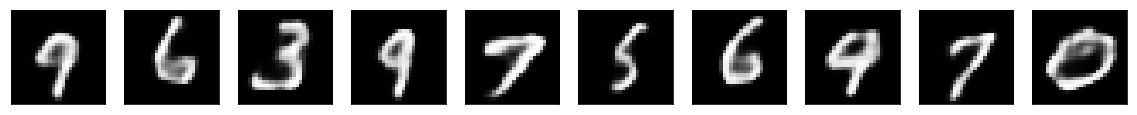

6000 [D loss: 0.637622, acc.: 65.62%] [G loss: 0.864753]
6001 [D loss: 0.640909, acc.: 64.84%] [G loss: 0.851582]
6002 [D loss: 0.663354, acc.: 57.81%] [G loss: 0.876457]
6003 [D loss: 0.625821, acc.: 70.31%] [G loss: 0.847116]
6004 [D loss: 0.638362, acc.: 64.06%] [G loss: 0.895627]
6005 [D loss: 0.639173, acc.: 68.75%] [G loss: 0.920596]
6006 [D loss: 0.620398, acc.: 68.75%] [G loss: 0.922374]
6007 [D loss: 0.621117, acc.: 66.41%] [G loss: 0.915943]
6008 [D loss: 0.621350, acc.: 68.75%] [G loss: 0.877371]
6009 [D loss: 0.629787, acc.: 65.62%] [G loss: 0.861916]
6010 [D loss: 0.672393, acc.: 54.69%] [G loss: 0.861074]
6011 [D loss: 0.630438, acc.: 64.06%] [G loss: 0.862702]
6012 [D loss: 0.640268, acc.: 63.28%] [G loss: 0.925719]
6013 [D loss: 0.643205, acc.: 64.84%] [G loss: 0.848193]
6014 [D loss: 0.644683, acc.: 62.50%] [G loss: 0.872771]
6015 [D loss: 0.621943, acc.: 69.53%] [G loss: 0.901357]
6016 [D loss: 0.618829, acc.: 66.41%] [G loss: 0.854989]
6017 [D loss: 0.643242, acc.: 6

6145 [D loss: 0.618309, acc.: 70.31%] [G loss: 0.850767]
6146 [D loss: 0.646385, acc.: 57.03%] [G loss: 0.864159]
6147 [D loss: 0.638048, acc.: 59.38%] [G loss: 0.869227]
6148 [D loss: 0.646431, acc.: 60.16%] [G loss: 0.823019]
6149 [D loss: 0.620641, acc.: 69.53%] [G loss: 0.856437]
6150 [D loss: 0.644732, acc.: 64.06%] [G loss: 0.855088]
6151 [D loss: 0.617061, acc.: 67.97%] [G loss: 0.868457]
6152 [D loss: 0.636195, acc.: 61.72%] [G loss: 0.860342]
6153 [D loss: 0.631273, acc.: 67.97%] [G loss: 0.889873]
6154 [D loss: 0.629603, acc.: 59.38%] [G loss: 0.885391]
6155 [D loss: 0.631315, acc.: 68.75%] [G loss: 0.879610]
6156 [D loss: 0.605697, acc.: 67.97%] [G loss: 0.892630]
6157 [D loss: 0.650961, acc.: 61.72%] [G loss: 0.891175]
6158 [D loss: 0.623331, acc.: 61.72%] [G loss: 0.876930]
6159 [D loss: 0.653988, acc.: 60.16%] [G loss: 0.865207]
6160 [D loss: 0.611798, acc.: 68.75%] [G loss: 0.869931]
6161 [D loss: 0.641556, acc.: 61.72%] [G loss: 0.907988]
6162 [D loss: 0.586587, acc.: 6

6291 [D loss: 0.645450, acc.: 57.81%] [G loss: 0.865616]
6292 [D loss: 0.617273, acc.: 67.97%] [G loss: 0.857643]
6293 [D loss: 0.630254, acc.: 63.28%] [G loss: 0.910049]
6294 [D loss: 0.612253, acc.: 72.66%] [G loss: 0.883156]
6295 [D loss: 0.602677, acc.: 66.41%] [G loss: 0.867508]
6296 [D loss: 0.645604, acc.: 64.84%] [G loss: 0.902828]
6297 [D loss: 0.625960, acc.: 64.84%] [G loss: 0.895924]
6298 [D loss: 0.623479, acc.: 63.28%] [G loss: 0.918061]
6299 [D loss: 0.636332, acc.: 58.59%] [G loss: 0.870756]
6300 [D loss: 0.624827, acc.: 66.41%] [G loss: 0.886979]
6301 [D loss: 0.632210, acc.: 59.38%] [G loss: 0.850741]
6302 [D loss: 0.638202, acc.: 66.41%] [G loss: 0.847361]
6303 [D loss: 0.604942, acc.: 70.31%] [G loss: 0.867976]
6304 [D loss: 0.639637, acc.: 57.81%] [G loss: 0.891653]
6305 [D loss: 0.652032, acc.: 63.28%] [G loss: 0.964138]
6306 [D loss: 0.647267, acc.: 56.25%] [G loss: 1.030478]
6307 [D loss: 0.660090, acc.: 62.50%] [G loss: 0.897322]
6308 [D loss: 0.633426, acc.: 5

6435 [D loss: 0.617633, acc.: 64.06%] [G loss: 0.897219]
6436 [D loss: 0.627360, acc.: 66.41%] [G loss: 0.867256]
6437 [D loss: 0.641296, acc.: 64.84%] [G loss: 0.881753]
6438 [D loss: 0.614691, acc.: 68.75%] [G loss: 0.859038]
6439 [D loss: 0.632904, acc.: 60.16%] [G loss: 0.856354]
6440 [D loss: 0.588682, acc.: 71.09%] [G loss: 0.917806]
6441 [D loss: 0.637330, acc.: 69.53%] [G loss: 0.870459]
6442 [D loss: 0.622780, acc.: 64.06%] [G loss: 0.890147]
6443 [D loss: 0.619365, acc.: 65.62%] [G loss: 0.863389]
6444 [D loss: 0.646763, acc.: 58.59%] [G loss: 0.878727]
6445 [D loss: 0.664449, acc.: 58.59%] [G loss: 0.861288]
6446 [D loss: 0.604994, acc.: 67.19%] [G loss: 0.910157]
6447 [D loss: 0.586186, acc.: 74.22%] [G loss: 0.897084]
6448 [D loss: 0.649381, acc.: 56.25%] [G loss: 0.902629]
6449 [D loss: 0.613799, acc.: 67.97%] [G loss: 0.878683]
6450 [D loss: 0.609963, acc.: 71.88%] [G loss: 0.878451]
6451 [D loss: 0.633992, acc.: 62.50%] [G loss: 0.845040]
6452 [D loss: 0.643193, acc.: 5

6579 [D loss: 0.614559, acc.: 64.06%] [G loss: 0.913105]
6580 [D loss: 0.627667, acc.: 64.06%] [G loss: 0.889382]
6581 [D loss: 0.578422, acc.: 69.53%] [G loss: 0.888748]
6582 [D loss: 0.588710, acc.: 68.75%] [G loss: 0.926204]
6583 [D loss: 0.650215, acc.: 60.16%] [G loss: 0.883377]
6584 [D loss: 0.640618, acc.: 60.94%] [G loss: 0.919842]
6585 [D loss: 0.594863, acc.: 66.41%] [G loss: 0.911946]
6586 [D loss: 0.654093, acc.: 59.38%] [G loss: 0.950845]
6587 [D loss: 0.657082, acc.: 57.03%] [G loss: 0.916840]
6588 [D loss: 0.611346, acc.: 67.19%] [G loss: 0.927334]
6589 [D loss: 0.631643, acc.: 64.06%] [G loss: 0.899889]
6590 [D loss: 0.637068, acc.: 61.72%] [G loss: 0.919882]
6591 [D loss: 0.706043, acc.: 53.91%] [G loss: 0.898717]
6592 [D loss: 0.635948, acc.: 62.50%] [G loss: 0.891594]
6593 [D loss: 0.641839, acc.: 63.28%] [G loss: 0.834962]
6594 [D loss: 0.629638, acc.: 63.28%] [G loss: 0.871879]
6595 [D loss: 0.616822, acc.: 59.38%] [G loss: 0.888372]
6596 [D loss: 0.630491, acc.: 7

6723 [D loss: 0.644598, acc.: 63.28%] [G loss: 0.909135]
6724 [D loss: 0.666612, acc.: 56.25%] [G loss: 0.898427]
6725 [D loss: 0.656551, acc.: 57.03%] [G loss: 0.894022]
6726 [D loss: 0.635825, acc.: 66.41%] [G loss: 0.881791]
6727 [D loss: 0.643265, acc.: 60.94%] [G loss: 0.900621]
6728 [D loss: 0.635539, acc.: 63.28%] [G loss: 0.898766]
6729 [D loss: 0.626337, acc.: 66.41%] [G loss: 0.864977]
6730 [D loss: 0.640716, acc.: 64.84%] [G loss: 0.888472]
6731 [D loss: 0.617980, acc.: 68.75%] [G loss: 0.889492]
6732 [D loss: 0.613412, acc.: 71.88%] [G loss: 0.906308]
6733 [D loss: 0.592318, acc.: 69.53%] [G loss: 0.865755]
6734 [D loss: 0.625467, acc.: 65.62%] [G loss: 0.895630]
6735 [D loss: 0.643801, acc.: 59.38%] [G loss: 0.884951]
6736 [D loss: 0.636835, acc.: 61.72%] [G loss: 0.890809]
6737 [D loss: 0.639374, acc.: 67.19%] [G loss: 0.875943]
6738 [D loss: 0.645632, acc.: 63.28%] [G loss: 0.893735]
6739 [D loss: 0.621907, acc.: 62.50%] [G loss: 0.904739]
6740 [D loss: 0.587541, acc.: 6

6869 [D loss: 0.635662, acc.: 67.19%] [G loss: 0.919383]
6870 [D loss: 0.665330, acc.: 58.59%] [G loss: 0.909149]
6871 [D loss: 0.643457, acc.: 59.38%] [G loss: 0.912759]
6872 [D loss: 0.632711, acc.: 64.06%] [G loss: 0.860734]
6873 [D loss: 0.653282, acc.: 61.72%] [G loss: 0.877864]
6874 [D loss: 0.631974, acc.: 66.41%] [G loss: 0.854903]
6875 [D loss: 0.614576, acc.: 63.28%] [G loss: 0.889579]
6876 [D loss: 0.624766, acc.: 64.84%] [G loss: 0.869564]
6877 [D loss: 0.662321, acc.: 57.03%] [G loss: 0.845745]
6878 [D loss: 0.632594, acc.: 64.06%] [G loss: 0.877999]
6879 [D loss: 0.647487, acc.: 61.72%] [G loss: 0.905734]
6880 [D loss: 0.646283, acc.: 58.59%] [G loss: 0.859839]
6881 [D loss: 0.624889, acc.: 67.19%] [G loss: 0.870577]
6882 [D loss: 0.618161, acc.: 62.50%] [G loss: 0.898157]
6883 [D loss: 0.606045, acc.: 69.53%] [G loss: 0.842806]
6884 [D loss: 0.624678, acc.: 65.62%] [G loss: 0.909130]
6885 [D loss: 0.612314, acc.: 63.28%] [G loss: 0.864375]
6886 [D loss: 0.609758, acc.: 7

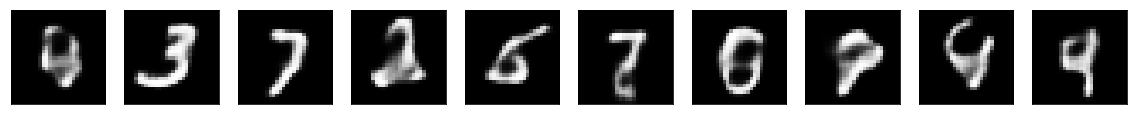

7000 [D loss: 0.630127, acc.: 64.06%] [G loss: 0.859039]
7001 [D loss: 0.631488, acc.: 63.28%] [G loss: 0.864811]
7002 [D loss: 0.619322, acc.: 65.62%] [G loss: 0.843138]
7003 [D loss: 0.640421, acc.: 63.28%] [G loss: 0.854895]
7004 [D loss: 0.630709, acc.: 68.75%] [G loss: 0.866696]
7005 [D loss: 0.647340, acc.: 59.38%] [G loss: 0.836715]
7006 [D loss: 0.624259, acc.: 67.19%] [G loss: 0.869056]
7007 [D loss: 0.633214, acc.: 61.72%] [G loss: 0.848053]
7008 [D loss: 0.635513, acc.: 63.28%] [G loss: 0.878691]
7009 [D loss: 0.629078, acc.: 64.84%] [G loss: 0.847190]
7010 [D loss: 0.649108, acc.: 62.50%] [G loss: 0.898681]
7011 [D loss: 0.615725, acc.: 70.31%] [G loss: 0.846403]
7012 [D loss: 0.630681, acc.: 61.72%] [G loss: 0.872283]
7013 [D loss: 0.602589, acc.: 67.19%] [G loss: 0.904619]
7014 [D loss: 0.649426, acc.: 65.62%] [G loss: 0.834062]
7015 [D loss: 0.601497, acc.: 66.41%] [G loss: 0.843135]
7016 [D loss: 0.606666, acc.: 64.84%] [G loss: 0.856280]
7017 [D loss: 0.575785, acc.: 7

7144 [D loss: 0.640370, acc.: 57.81%] [G loss: 0.881373]
7145 [D loss: 0.595199, acc.: 67.19%] [G loss: 0.895123]
7146 [D loss: 0.644782, acc.: 66.41%] [G loss: 0.858654]
7147 [D loss: 0.656801, acc.: 63.28%] [G loss: 0.867153]
7148 [D loss: 0.624269, acc.: 64.06%] [G loss: 0.880828]
7149 [D loss: 0.658172, acc.: 64.84%] [G loss: 0.917293]
7150 [D loss: 0.655816, acc.: 62.50%] [G loss: 0.937645]
7151 [D loss: 0.628092, acc.: 60.94%] [G loss: 0.947837]
7152 [D loss: 0.619693, acc.: 64.84%] [G loss: 0.946405]
7153 [D loss: 0.650111, acc.: 59.38%] [G loss: 1.031093]
7154 [D loss: 0.595290, acc.: 68.75%] [G loss: 0.873683]
7155 [D loss: 0.610487, acc.: 64.84%] [G loss: 0.880367]
7156 [D loss: 0.637783, acc.: 60.94%] [G loss: 0.961615]
7157 [D loss: 0.612718, acc.: 60.94%] [G loss: 0.901949]
7158 [D loss: 0.609839, acc.: 65.62%] [G loss: 0.843387]
7159 [D loss: 0.620626, acc.: 63.28%] [G loss: 0.900458]
7160 [D loss: 0.595260, acc.: 75.00%] [G loss: 0.882543]
7161 [D loss: 0.629802, acc.: 5

7292 [D loss: 0.661249, acc.: 58.59%] [G loss: 0.859477]
7293 [D loss: 0.610564, acc.: 67.97%] [G loss: 0.862381]
7294 [D loss: 0.673350, acc.: 63.28%] [G loss: 0.830058]
7295 [D loss: 0.614672, acc.: 65.62%] [G loss: 0.850323]
7296 [D loss: 0.673113, acc.: 62.50%] [G loss: 0.880067]
7297 [D loss: 0.661950, acc.: 61.72%] [G loss: 0.876402]
7298 [D loss: 0.605630, acc.: 68.75%] [G loss: 0.876742]
7299 [D loss: 0.652585, acc.: 62.50%] [G loss: 0.892984]
7300 [D loss: 0.659215, acc.: 52.34%] [G loss: 0.915564]
7301 [D loss: 0.642526, acc.: 62.50%] [G loss: 0.899048]
7302 [D loss: 0.676839, acc.: 64.06%] [G loss: 0.883084]
7303 [D loss: 0.668509, acc.: 64.06%] [G loss: 0.875482]
7304 [D loss: 0.649692, acc.: 64.84%] [G loss: 0.909621]
7305 [D loss: 0.636148, acc.: 63.28%] [G loss: 0.903327]
7306 [D loss: 0.650330, acc.: 64.06%] [G loss: 0.921777]
7307 [D loss: 0.629480, acc.: 68.75%] [G loss: 0.919303]
7308 [D loss: 0.631934, acc.: 61.72%] [G loss: 0.905177]
7309 [D loss: 0.611957, acc.: 6

7440 [D loss: 0.610695, acc.: 66.41%] [G loss: 0.885443]
7441 [D loss: 0.592336, acc.: 68.75%] [G loss: 0.937964]
7442 [D loss: 0.608073, acc.: 69.53%] [G loss: 0.882508]
7443 [D loss: 0.621281, acc.: 62.50%] [G loss: 0.838171]
7444 [D loss: 0.642249, acc.: 59.38%] [G loss: 0.886614]
7445 [D loss: 0.619666, acc.: 65.62%] [G loss: 0.869533]
7446 [D loss: 0.617457, acc.: 64.84%] [G loss: 0.876847]
7447 [D loss: 0.638846, acc.: 57.03%] [G loss: 0.884448]
7448 [D loss: 0.586811, acc.: 73.44%] [G loss: 0.876821]
7449 [D loss: 0.667236, acc.: 58.59%] [G loss: 0.865546]
7450 [D loss: 0.647215, acc.: 58.59%] [G loss: 0.856695]
7451 [D loss: 0.616620, acc.: 67.19%] [G loss: 0.867766]
7452 [D loss: 0.617557, acc.: 67.19%] [G loss: 0.857282]
7453 [D loss: 0.624686, acc.: 65.62%] [G loss: 0.884336]
7454 [D loss: 0.620650, acc.: 63.28%] [G loss: 0.851067]
7455 [D loss: 0.646060, acc.: 63.28%] [G loss: 0.866459]
7456 [D loss: 0.676305, acc.: 57.03%] [G loss: 0.932673]
7457 [D loss: 0.647194, acc.: 6

7588 [D loss: 0.620471, acc.: 65.62%] [G loss: 0.891157]
7589 [D loss: 0.638985, acc.: 60.16%] [G loss: 0.904740]
7590 [D loss: 0.596202, acc.: 64.84%] [G loss: 0.863407]
7591 [D loss: 0.638421, acc.: 65.62%] [G loss: 0.900195]
7592 [D loss: 0.612070, acc.: 67.97%] [G loss: 0.844023]
7593 [D loss: 0.612696, acc.: 67.97%] [G loss: 0.911178]
7594 [D loss: 0.642030, acc.: 67.97%] [G loss: 0.946795]
7595 [D loss: 0.628824, acc.: 65.62%] [G loss: 0.875379]
7596 [D loss: 0.622645, acc.: 65.62%] [G loss: 0.828872]
7597 [D loss: 0.608384, acc.: 71.88%] [G loss: 0.849625]
7598 [D loss: 0.616113, acc.: 66.41%] [G loss: 0.894483]
7599 [D loss: 0.648302, acc.: 59.38%] [G loss: 0.907273]
7600 [D loss: 0.632149, acc.: 63.28%] [G loss: 0.910174]
7601 [D loss: 0.662316, acc.: 54.69%] [G loss: 0.878931]
7602 [D loss: 0.648621, acc.: 62.50%] [G loss: 0.874612]
7603 [D loss: 0.645700, acc.: 61.72%] [G loss: 0.914389]
7604 [D loss: 0.648034, acc.: 57.81%] [G loss: 0.939110]
7605 [D loss: 0.596137, acc.: 6

7739 [D loss: 0.603772, acc.: 63.28%] [G loss: 0.901216]
7740 [D loss: 0.616891, acc.: 60.16%] [G loss: 0.871207]
7741 [D loss: 0.622452, acc.: 64.06%] [G loss: 0.877938]
7742 [D loss: 0.601953, acc.: 65.62%] [G loss: 0.905620]
7743 [D loss: 0.616386, acc.: 64.84%] [G loss: 0.884947]
7744 [D loss: 0.603085, acc.: 64.84%] [G loss: 0.927669]
7745 [D loss: 0.627727, acc.: 63.28%] [G loss: 0.934370]
7746 [D loss: 0.658807, acc.: 53.91%] [G loss: 0.903389]
7747 [D loss: 0.613193, acc.: 67.97%] [G loss: 0.889903]
7748 [D loss: 0.639356, acc.: 62.50%] [G loss: 0.886297]
7749 [D loss: 0.625621, acc.: 63.28%] [G loss: 0.907086]
7750 [D loss: 0.643795, acc.: 59.38%] [G loss: 0.869813]
7751 [D loss: 0.613806, acc.: 68.75%] [G loss: 0.922830]
7752 [D loss: 0.627618, acc.: 63.28%] [G loss: 0.888487]
7753 [D loss: 0.607376, acc.: 69.53%] [G loss: 0.890519]
7754 [D loss: 0.644117, acc.: 56.25%] [G loss: 0.887864]
7755 [D loss: 0.677600, acc.: 53.91%] [G loss: 0.878029]
7756 [D loss: 0.596852, acc.: 7

7889 [D loss: 0.632389, acc.: 65.62%] [G loss: 0.869651]
7890 [D loss: 0.625822, acc.: 67.19%] [G loss: 0.889527]
7891 [D loss: 0.614803, acc.: 64.06%] [G loss: 0.908713]
7892 [D loss: 0.636197, acc.: 59.38%] [G loss: 0.907145]
7893 [D loss: 0.655095, acc.: 57.81%] [G loss: 0.910386]
7894 [D loss: 0.614847, acc.: 64.84%] [G loss: 0.882848]
7895 [D loss: 0.629684, acc.: 68.75%] [G loss: 0.856285]
7896 [D loss: 0.644518, acc.: 60.94%] [G loss: 0.899526]
7897 [D loss: 0.610849, acc.: 65.62%] [G loss: 0.871251]
7898 [D loss: 0.621694, acc.: 63.28%] [G loss: 0.881386]
7899 [D loss: 0.607102, acc.: 70.31%] [G loss: 0.868661]
7900 [D loss: 0.615959, acc.: 66.41%] [G loss: 0.885708]
7901 [D loss: 0.603745, acc.: 65.62%] [G loss: 0.878756]
7902 [D loss: 0.638453, acc.: 67.19%] [G loss: 0.921902]
7903 [D loss: 0.652798, acc.: 56.25%] [G loss: 0.963677]
7904 [D loss: 0.648229, acc.: 60.16%] [G loss: 0.925434]
7905 [D loss: 0.631327, acc.: 61.72%] [G loss: 0.911836]
7906 [D loss: 0.644508, acc.: 5

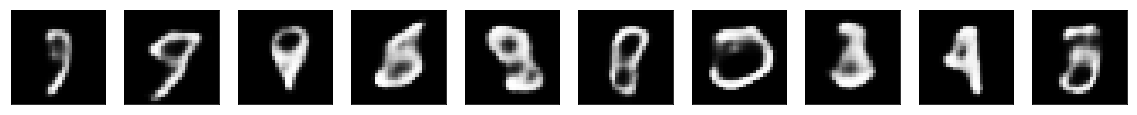

8000 [D loss: 0.620181, acc.: 67.97%] [G loss: 0.889521]
8001 [D loss: 0.629943, acc.: 66.41%] [G loss: 0.874438]
8002 [D loss: 0.655641, acc.: 61.72%] [G loss: 0.885457]
8003 [D loss: 0.612451, acc.: 62.50%] [G loss: 0.872635]
8004 [D loss: 0.668407, acc.: 58.59%] [G loss: 0.869384]
8005 [D loss: 0.620833, acc.: 63.28%] [G loss: 0.921178]
8006 [D loss: 0.635673, acc.: 63.28%] [G loss: 0.869538]
8007 [D loss: 0.666037, acc.: 63.28%] [G loss: 0.835303]
8008 [D loss: 0.642313, acc.: 60.94%] [G loss: 0.897764]
8009 [D loss: 0.584998, acc.: 72.66%] [G loss: 0.892724]
8010 [D loss: 0.654191, acc.: 59.38%] [G loss: 0.864865]
8011 [D loss: 0.623937, acc.: 68.75%] [G loss: 0.886885]
8012 [D loss: 0.614728, acc.: 70.31%] [G loss: 0.879421]
8013 [D loss: 0.639799, acc.: 57.81%] [G loss: 0.874772]
8014 [D loss: 0.674254, acc.: 61.72%] [G loss: 0.903284]
8015 [D loss: 0.644284, acc.: 63.28%] [G loss: 0.867500]
8016 [D loss: 0.650374, acc.: 59.38%] [G loss: 0.872920]
8017 [D loss: 0.660024, acc.: 6

8147 [D loss: 0.601652, acc.: 70.31%] [G loss: 0.901217]
8148 [D loss: 0.628612, acc.: 64.06%] [G loss: 0.901330]
8149 [D loss: 0.635415, acc.: 59.38%] [G loss: 0.874863]
8150 [D loss: 0.643901, acc.: 59.38%] [G loss: 0.888532]
8151 [D loss: 0.626432, acc.: 67.19%] [G loss: 0.898028]
8152 [D loss: 0.622395, acc.: 60.94%] [G loss: 0.859251]
8153 [D loss: 0.681989, acc.: 58.59%] [G loss: 0.910963]
8154 [D loss: 0.676634, acc.: 57.03%] [G loss: 0.883966]
8155 [D loss: 0.615834, acc.: 69.53%] [G loss: 0.896417]
8156 [D loss: 0.637234, acc.: 65.62%] [G loss: 0.900384]
8157 [D loss: 0.610521, acc.: 65.62%] [G loss: 0.957115]
8158 [D loss: 0.589975, acc.: 71.09%] [G loss: 0.885260]
8159 [D loss: 0.633542, acc.: 63.28%] [G loss: 0.912782]
8160 [D loss: 0.604618, acc.: 67.19%] [G loss: 0.871559]
8161 [D loss: 0.585470, acc.: 70.31%] [G loss: 0.888132]
8162 [D loss: 0.637487, acc.: 57.81%] [G loss: 0.863772]
8163 [D loss: 0.645228, acc.: 62.50%] [G loss: 0.910932]
8164 [D loss: 0.652654, acc.: 5

8295 [D loss: 0.662272, acc.: 60.94%] [G loss: 0.878624]
8296 [D loss: 0.664444, acc.: 57.81%] [G loss: 0.857537]
8297 [D loss: 0.661063, acc.: 60.16%] [G loss: 0.823766]
8298 [D loss: 0.627081, acc.: 67.19%] [G loss: 0.907595]
8299 [D loss: 0.622431, acc.: 69.53%] [G loss: 0.896021]
8300 [D loss: 0.637572, acc.: 63.28%] [G loss: 0.881480]
8301 [D loss: 0.603485, acc.: 71.88%] [G loss: 0.903329]
8302 [D loss: 0.631103, acc.: 64.84%] [G loss: 0.871556]
8303 [D loss: 0.610486, acc.: 63.28%] [G loss: 0.856690]
8304 [D loss: 0.643821, acc.: 66.41%] [G loss: 0.855826]
8305 [D loss: 0.619646, acc.: 69.53%] [G loss: 0.900773]
8306 [D loss: 0.611577, acc.: 67.97%] [G loss: 0.886376]
8307 [D loss: 0.672946, acc.: 57.81%] [G loss: 0.902464]
8308 [D loss: 0.624767, acc.: 66.41%] [G loss: 0.851638]
8309 [D loss: 0.652117, acc.: 64.84%] [G loss: 0.860313]
8310 [D loss: 0.625355, acc.: 65.62%] [G loss: 0.875352]
8311 [D loss: 0.616834, acc.: 64.84%] [G loss: 0.892559]
8312 [D loss: 0.617492, acc.: 6

8440 [D loss: 0.657092, acc.: 59.38%] [G loss: 0.875763]
8441 [D loss: 0.634529, acc.: 62.50%] [G loss: 0.903106]
8442 [D loss: 0.594269, acc.: 68.75%] [G loss: 0.889342]
8443 [D loss: 0.618612, acc.: 65.62%] [G loss: 0.872684]
8444 [D loss: 0.641517, acc.: 60.94%] [G loss: 0.856451]
8445 [D loss: 0.621811, acc.: 62.50%] [G loss: 0.830961]
8446 [D loss: 0.649718, acc.: 64.84%] [G loss: 0.861287]
8447 [D loss: 0.598689, acc.: 65.62%] [G loss: 0.867734]
8448 [D loss: 0.627761, acc.: 64.06%] [G loss: 0.949857]
8449 [D loss: 0.649896, acc.: 62.50%] [G loss: 0.913473]
8450 [D loss: 0.622238, acc.: 64.06%] [G loss: 0.862587]
8451 [D loss: 0.586935, acc.: 69.53%] [G loss: 0.856306]
8452 [D loss: 0.642667, acc.: 68.75%] [G loss: 0.860085]
8453 [D loss: 0.677158, acc.: 55.47%] [G loss: 0.846703]
8454 [D loss: 0.627788, acc.: 69.53%] [G loss: 0.836679]
8455 [D loss: 0.639151, acc.: 60.94%] [G loss: 0.863838]
8456 [D loss: 0.652358, acc.: 65.62%] [G loss: 0.869752]
8457 [D loss: 0.641959, acc.: 6

8587 [D loss: 0.664865, acc.: 57.81%] [G loss: 0.884504]
8588 [D loss: 0.649317, acc.: 63.28%] [G loss: 0.914793]
8589 [D loss: 0.669751, acc.: 59.38%] [G loss: 0.883208]
8590 [D loss: 0.616562, acc.: 61.72%] [G loss: 0.881988]
8591 [D loss: 0.625311, acc.: 61.72%] [G loss: 0.874554]
8592 [D loss: 0.600276, acc.: 69.53%] [G loss: 0.890767]
8593 [D loss: 0.597746, acc.: 68.75%] [G loss: 0.927482]
8594 [D loss: 0.658098, acc.: 60.16%] [G loss: 0.909155]
8595 [D loss: 0.635786, acc.: 64.84%] [G loss: 0.891501]
8596 [D loss: 0.638946, acc.: 61.72%] [G loss: 0.937906]
8597 [D loss: 0.646024, acc.: 60.94%] [G loss: 0.907305]
8598 [D loss: 0.634629, acc.: 63.28%] [G loss: 0.910626]
8599 [D loss: 0.624798, acc.: 63.28%] [G loss: 0.871000]
8600 [D loss: 0.671564, acc.: 60.16%] [G loss: 0.895125]
8601 [D loss: 0.655357, acc.: 55.47%] [G loss: 0.907280]
8602 [D loss: 0.649665, acc.: 63.28%] [G loss: 0.896614]
8603 [D loss: 0.646089, acc.: 63.28%] [G loss: 0.906044]
8604 [D loss: 0.664973, acc.: 5

8731 [D loss: 0.617506, acc.: 67.19%] [G loss: 0.867789]
8732 [D loss: 0.656079, acc.: 59.38%] [G loss: 0.926111]
8733 [D loss: 0.632996, acc.: 61.72%] [G loss: 0.858835]
8734 [D loss: 0.617800, acc.: 64.84%] [G loss: 0.896074]
8735 [D loss: 0.637360, acc.: 61.72%] [G loss: 0.853189]
8736 [D loss: 0.597643, acc.: 71.09%] [G loss: 0.882645]
8737 [D loss: 0.604426, acc.: 67.19%] [G loss: 0.855056]
8738 [D loss: 0.624035, acc.: 61.72%] [G loss: 0.929787]
8739 [D loss: 0.632411, acc.: 67.19%] [G loss: 0.859239]
8740 [D loss: 0.609662, acc.: 64.06%] [G loss: 0.855775]
8741 [D loss: 0.640586, acc.: 59.38%] [G loss: 0.879011]
8742 [D loss: 0.622063, acc.: 65.62%] [G loss: 0.863228]
8743 [D loss: 0.619815, acc.: 64.06%] [G loss: 0.880276]
8744 [D loss: 0.659856, acc.: 60.16%] [G loss: 0.900159]
8745 [D loss: 0.593846, acc.: 71.09%] [G loss: 0.904550]
8746 [D loss: 0.659285, acc.: 64.84%] [G loss: 0.923014]
8747 [D loss: 0.632470, acc.: 62.50%] [G loss: 0.939071]
8748 [D loss: 0.623096, acc.: 6

8877 [D loss: 0.606452, acc.: 71.09%] [G loss: 0.872859]
8878 [D loss: 0.615867, acc.: 65.62%] [G loss: 0.900009]
8879 [D loss: 0.644453, acc.: 60.16%] [G loss: 0.868796]
8880 [D loss: 0.594548, acc.: 68.75%] [G loss: 0.879866]
8881 [D loss: 0.592816, acc.: 69.53%] [G loss: 0.885723]
8882 [D loss: 0.609639, acc.: 63.28%] [G loss: 0.883907]
8883 [D loss: 0.632200, acc.: 61.72%] [G loss: 0.889820]
8884 [D loss: 0.611712, acc.: 64.84%] [G loss: 0.904416]
8885 [D loss: 0.653063, acc.: 61.72%] [G loss: 0.904079]
8886 [D loss: 0.647803, acc.: 58.59%] [G loss: 0.855076]
8887 [D loss: 0.614115, acc.: 67.19%] [G loss: 0.894735]
8888 [D loss: 0.587117, acc.: 69.53%] [G loss: 0.879538]
8889 [D loss: 0.587693, acc.: 66.41%] [G loss: 0.905071]
8890 [D loss: 0.641452, acc.: 63.28%] [G loss: 0.877172]
8891 [D loss: 0.613556, acc.: 64.06%] [G loss: 0.858110]
8892 [D loss: 0.648353, acc.: 58.59%] [G loss: 0.846854]
8893 [D loss: 0.620315, acc.: 63.28%] [G loss: 0.883357]
8894 [D loss: 0.602406, acc.: 6

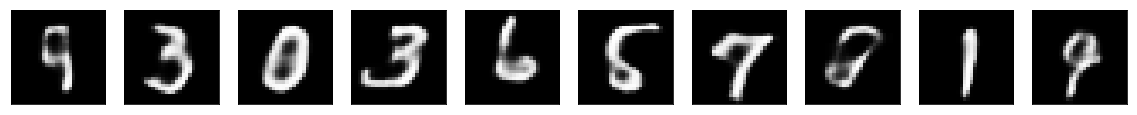

9000 [D loss: 0.622924, acc.: 61.72%] [G loss: 0.887728]
9001 [D loss: 0.673589, acc.: 61.72%] [G loss: 0.891341]
9002 [D loss: 0.634664, acc.: 65.62%] [G loss: 0.891198]
9003 [D loss: 0.615772, acc.: 65.62%] [G loss: 0.904406]
9004 [D loss: 0.617322, acc.: 61.72%] [G loss: 0.868039]
9005 [D loss: 0.654059, acc.: 66.41%] [G loss: 0.847960]
9006 [D loss: 0.610506, acc.: 69.53%] [G loss: 0.881161]
9007 [D loss: 0.641269, acc.: 56.25%] [G loss: 0.923020]
9008 [D loss: 0.621451, acc.: 67.19%] [G loss: 0.929002]
9009 [D loss: 0.637448, acc.: 62.50%] [G loss: 0.892731]
9010 [D loss: 0.648583, acc.: 61.72%] [G loss: 0.802473]
9011 [D loss: 0.643501, acc.: 60.94%] [G loss: 0.874874]
9012 [D loss: 0.666468, acc.: 60.94%] [G loss: 0.851154]
9013 [D loss: 0.620927, acc.: 64.06%] [G loss: 0.871508]
9014 [D loss: 0.642299, acc.: 62.50%] [G loss: 0.890785]
9015 [D loss: 0.611425, acc.: 66.41%] [G loss: 0.889249]
9016 [D loss: 0.638487, acc.: 66.41%] [G loss: 0.924382]
9017 [D loss: 0.624713, acc.: 6

9145 [D loss: 0.592249, acc.: 71.88%] [G loss: 0.889919]
9146 [D loss: 0.645106, acc.: 64.84%] [G loss: 0.923546]
9147 [D loss: 0.659403, acc.: 57.81%] [G loss: 0.847635]
9148 [D loss: 0.669919, acc.: 58.59%] [G loss: 0.867599]
9149 [D loss: 0.611387, acc.: 69.53%] [G loss: 0.894407]
9150 [D loss: 0.625750, acc.: 67.97%] [G loss: 0.847347]
9151 [D loss: 0.629791, acc.: 66.41%] [G loss: 0.904070]
9152 [D loss: 0.660781, acc.: 57.03%] [G loss: 0.871544]
9153 [D loss: 0.645754, acc.: 59.38%] [G loss: 0.855197]
9154 [D loss: 0.620557, acc.: 64.84%] [G loss: 0.890771]
9155 [D loss: 0.639998, acc.: 63.28%] [G loss: 0.881013]
9156 [D loss: 0.600301, acc.: 66.41%] [G loss: 0.849451]
9157 [D loss: 0.652991, acc.: 59.38%] [G loss: 0.885367]
9158 [D loss: 0.633507, acc.: 64.06%] [G loss: 0.856717]
9159 [D loss: 0.634365, acc.: 65.62%] [G loss: 0.857345]
9160 [D loss: 0.652824, acc.: 63.28%] [G loss: 0.900658]
9161 [D loss: 0.657967, acc.: 57.03%] [G loss: 0.911748]
9162 [D loss: 0.581723, acc.: 7

9291 [D loss: 0.601259, acc.: 67.19%] [G loss: 0.850849]
9292 [D loss: 0.662986, acc.: 60.16%] [G loss: 0.852075]
9293 [D loss: 0.616009, acc.: 65.62%] [G loss: 0.856745]
9294 [D loss: 0.628970, acc.: 63.28%] [G loss: 0.884115]
9295 [D loss: 0.606370, acc.: 66.41%] [G loss: 0.866781]
9296 [D loss: 0.635106, acc.: 60.16%] [G loss: 0.860575]
9297 [D loss: 0.657194, acc.: 60.16%] [G loss: 0.875730]
9298 [D loss: 0.619387, acc.: 64.06%] [G loss: 0.909752]
9299 [D loss: 0.595198, acc.: 67.19%] [G loss: 0.867106]
9300 [D loss: 0.616532, acc.: 67.19%] [G loss: 0.897250]
9301 [D loss: 0.648283, acc.: 57.81%] [G loss: 0.858701]
9302 [D loss: 0.657567, acc.: 57.03%] [G loss: 0.889186]
9303 [D loss: 0.609867, acc.: 70.31%] [G loss: 0.866492]
9304 [D loss: 0.640813, acc.: 60.16%] [G loss: 0.891213]
9305 [D loss: 0.647275, acc.: 62.50%] [G loss: 0.927287]
9306 [D loss: 0.602146, acc.: 64.06%] [G loss: 0.872545]
9307 [D loss: 0.573563, acc.: 70.31%] [G loss: 0.895932]
9308 [D loss: 0.635197, acc.: 6

9441 [D loss: 0.635594, acc.: 64.06%] [G loss: 0.875826]
9442 [D loss: 0.641831, acc.: 60.16%] [G loss: 0.865333]
9443 [D loss: 0.653077, acc.: 60.94%] [G loss: 0.856673]
9444 [D loss: 0.631120, acc.: 60.94%] [G loss: 0.906292]
9445 [D loss: 0.664676, acc.: 55.47%] [G loss: 0.885638]
9446 [D loss: 0.615672, acc.: 60.94%] [G loss: 0.888555]
9447 [D loss: 0.630679, acc.: 60.94%] [G loss: 0.900068]
9448 [D loss: 0.615792, acc.: 66.41%] [G loss: 0.896651]
9449 [D loss: 0.611522, acc.: 67.97%] [G loss: 0.952763]
9450 [D loss: 0.646775, acc.: 62.50%] [G loss: 0.873943]
9451 [D loss: 0.598027, acc.: 71.88%] [G loss: 0.877386]
9452 [D loss: 0.643219, acc.: 63.28%] [G loss: 0.887521]
9453 [D loss: 0.596864, acc.: 66.41%] [G loss: 0.912841]
9454 [D loss: 0.631517, acc.: 61.72%] [G loss: 0.884205]
9455 [D loss: 0.636650, acc.: 59.38%] [G loss: 0.864188]
9456 [D loss: 0.613305, acc.: 64.84%] [G loss: 0.847064]
9457 [D loss: 0.625191, acc.: 64.84%] [G loss: 0.897793]
9458 [D loss: 0.627491, acc.: 6

9592 [D loss: 0.605034, acc.: 68.75%] [G loss: 0.887136]
9593 [D loss: 0.599359, acc.: 64.84%] [G loss: 0.902443]
9594 [D loss: 0.594014, acc.: 68.75%] [G loss: 0.871350]
9595 [D loss: 0.644423, acc.: 55.47%] [G loss: 0.902859]
9596 [D loss: 0.666103, acc.: 51.56%] [G loss: 0.882919]
9597 [D loss: 0.642452, acc.: 63.28%] [G loss: 0.905022]
9598 [D loss: 0.602798, acc.: 68.75%] [G loss: 0.872835]
9599 [D loss: 0.619461, acc.: 60.16%] [G loss: 0.903725]
9600 [D loss: 0.676024, acc.: 56.25%] [G loss: 0.857139]
9601 [D loss: 0.602825, acc.: 64.84%] [G loss: 0.938521]
9602 [D loss: 0.674560, acc.: 60.94%] [G loss: 0.941035]
9603 [D loss: 0.627894, acc.: 62.50%] [G loss: 0.862066]
9604 [D loss: 0.618487, acc.: 68.75%] [G loss: 0.912891]
9605 [D loss: 0.635556, acc.: 67.19%] [G loss: 0.949294]
9606 [D loss: 0.630436, acc.: 62.50%] [G loss: 0.886179]
9607 [D loss: 0.637571, acc.: 60.94%] [G loss: 0.911492]
9608 [D loss: 0.591896, acc.: 72.66%] [G loss: 0.888767]
9609 [D loss: 0.641545, acc.: 6

9739 [D loss: 0.645901, acc.: 63.28%] [G loss: 0.902221]
9740 [D loss: 0.632615, acc.: 59.38%] [G loss: 0.920416]
9741 [D loss: 0.608041, acc.: 63.28%] [G loss: 0.857035]
9742 [D loss: 0.642926, acc.: 56.25%] [G loss: 0.928929]
9743 [D loss: 0.633993, acc.: 60.16%] [G loss: 0.908703]
9744 [D loss: 0.613471, acc.: 62.50%] [G loss: 0.906020]
9745 [D loss: 0.600433, acc.: 64.06%] [G loss: 0.940686]
9746 [D loss: 0.598595, acc.: 65.62%] [G loss: 0.926153]
9747 [D loss: 0.675780, acc.: 57.03%] [G loss: 0.922811]
9748 [D loss: 0.646249, acc.: 61.72%] [G loss: 0.919578]
9749 [D loss: 0.607618, acc.: 71.09%] [G loss: 0.916829]
9750 [D loss: 0.630101, acc.: 65.62%] [G loss: 0.946779]
9751 [D loss: 0.650599, acc.: 58.59%] [G loss: 0.875816]
9752 [D loss: 0.610353, acc.: 67.19%] [G loss: 0.862602]
9753 [D loss: 0.620997, acc.: 66.41%] [G loss: 0.898081]
9754 [D loss: 0.640927, acc.: 64.84%] [G loss: 0.887801]
9755 [D loss: 0.619383, acc.: 64.84%] [G loss: 0.890708]
9756 [D loss: 0.593791, acc.: 6

9886 [D loss: 0.620452, acc.: 67.19%] [G loss: 0.878633]
9887 [D loss: 0.639697, acc.: 63.28%] [G loss: 0.829945]
9888 [D loss: 0.614626, acc.: 64.06%] [G loss: 0.889002]
9889 [D loss: 0.624487, acc.: 70.31%] [G loss: 0.852292]
9890 [D loss: 0.643579, acc.: 60.94%] [G loss: 0.918153]
9891 [D loss: 0.622143, acc.: 60.94%] [G loss: 0.875116]
9892 [D loss: 0.655266, acc.: 61.72%] [G loss: 0.861264]
9893 [D loss: 0.649106, acc.: 60.94%] [G loss: 0.860274]
9894 [D loss: 0.654190, acc.: 62.50%] [G loss: 0.873703]
9895 [D loss: 0.618191, acc.: 63.28%] [G loss: 0.855939]
9896 [D loss: 0.611621, acc.: 67.19%] [G loss: 0.878289]
9897 [D loss: 0.602066, acc.: 67.19%] [G loss: 0.869901]
9898 [D loss: 0.616824, acc.: 65.62%] [G loss: 0.888013]
9899 [D loss: 0.633187, acc.: 61.72%] [G loss: 0.871752]
9900 [D loss: 0.639697, acc.: 63.28%] [G loss: 0.887261]
9901 [D loss: 0.645690, acc.: 61.72%] [G loss: 0.868671]
9902 [D loss: 0.607008, acc.: 67.19%] [G loss: 0.877274]
9903 [D loss: 0.617482, acc.: 6

In [6]:
import matplotlib.pyplot as plt

discriminator_input_dim = (64,)
generator_input_dim = (100,)
batch_size = 128
epochs = 10000

discriminator_input = Input(shape=discriminator_input_dim)
generator_input = Input(shape=generator_input_dim)
input_double = Input(shape=generator_input_dim)

def custom_activation(x):
    return (K.sigmoid(x) * 3) 

def discriminator(x):
    hidden1 = Dense(256, activation="relu")(x)
    hidden2 = Dense(256, activation="relu")(hidden1)
    return Dense(1, activation="sigmoid")(hidden2)
    
def generator(x):
    hidden1 = Dense(256, activation="relu")(x)
    hidden2 = Dense(256, activation="relu")(hidden1)
    return Dense(64, activation=custom_activation)(hidden2)

generator_model = Model(generator_input, generator(generator_input))
discriminator_model = Model(discriminator_input, discriminator(discriminator_input))
discriminator_model.compile(loss='binary_crossentropy', optimizer="adadelta", metrics=['accuracy'])
generator_model.compile(loss='binary_crossentropy', optimizer="adadelta")

img = generator_model(input_double)
discriminator_model.trainable = False
valid = discriminator_model(img)

double_model = Model(input_double, valid)
double_model.compile(loss='binary_crossentropy', optimizer="adadelta")

X_train = data_x.reshape(60000, 64)
half_batch = int(batch_size / 2)
for epoch in range(epochs):  
    if epoch % 1000 == 0:
        n = 10
        plt.figure(figsize=(20, 4))
        for i in range(n):
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(decoder.predict(generator_model.predict(np.random.normal(0, 1, (1, 100))).reshape((1,4,4,4))).reshape(28, 28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.gray()
        plt.show()
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator_model.predict(noise)

    d_loss_real = discriminator_model.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator_model.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = double_model.train_on_batch(noise, np.ones((batch_size, 1)))

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

In [7]:
import json
with open('generator.json', 'w') as outfile:
    outfile.write(generator_model.to_json())
with open('discriminator.json', 'w') as outfile:
    outfile.write(discriminator_model.to_json())

generator_model.save_weights("generator.h5")
discriminator_model.save_weights("discriminator.h5")